In [4]:
# Imports:
from agents.Agent import Agent
from BMTask import State
from BMTemplate import Template
from templates.Falling_Ball_Template import FallingBall
from rewards.BMRewardFunction import RewardFunction
from rewards.NewHeightReward import NewHeightReward
from rewards.HeightCompute import HeightCompute

from agents.DistributionAgent import DistributionAgent
from agents.HeuristicAvoidAgent import HeuristicAvoidAgent
from agents.HeuristicPushAgent import HeuristicPushAgent

from templates.Seesaw_Template import Seesaw
from templates.Templates import REGISTRY as tempReg
from templates.Templates import register_template

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [126]:
# deprecated
# """ Compute the average rewards per step for a linear space of variants of a template """
# def computeAverageRewards(  agent: Agent, template: Template, 
#                             rewardfn: RewardFunction, VARIANTS: int = 40, 
#                             ATTEMPTS: int = 3, ITERS: int = 800) -> list[float]:

#     avrewards = []

#     total = ITERS * ATTEMPTS * VARIANTS
#     current = 0
#     for i in range(0, VARIANTS):
#         stepsTaken = 0
#         avreward = 0.0

#         print("Variant: " + str(i) + ". Progress: " + str(current / total))
#         for j in range(ATTEMPTS):
#             state = template.create_world(variant = float(i / VARIANTS))
#             for k in range(0, ITERS):
#                 # take action and simulate:
#                 state.apply_action(agent.take_action(state))
#                 # get reward:
#                 avreward += rewardfn.compute(state)
#                 # could check here if sim ends:
#                 stepsTaken += 1
#                 current += 1

#         avreward /= stepsTaken
#         avrewards.append(avreward)

#     return avrewards

In [5]:
""" Compute the average rewards per step for a linear space of variants of a template """
def computeAverageRewardsIterations(  agent: Agent, template: Template, 
                            rewardfn: RewardFunction, VARIANTS: int = 40, 
                            ATTEMPTS: int = 3, ITERS: int = 800) -> list[float]:

    avrewards = []

    total = ITERS * ATTEMPTS * VARIANTS
    current = 0
    for i in range(0, VARIANTS):
        stepsTaken = 0
        avreward = 0.0

        print("Variant: " + str(i) + ". Progress: " + str(current / total))
        avrewardsIterations = []
        for j in range(ATTEMPTS):
            state = template.create_world(variant = float(i / VARIANTS))
            iterations = []
            for k in range(0, ITERS):
                # take action and simulate:
                state.apply_action(agent.take_action(state))
                # get reward:
                reward = rewardfn.compute(state)
#                 avreward += rewardfn.compute(state)
                # could check here if sim ends:
                if (reward < -50) or (reward > 50):
                    avreward = 0
                else:
                    stepsTaken += 1
                    avreward += reward
                current += 1
                iterations.append(avreward/stepsTaken)
            avrewardsIterations.append(tuple([j, iterations]))
        avrewards.append(tuple([i, avrewardsIterations]))

    return avrewards

In [642]:
# """ Compute the average rewards per step for a linear space of variants of a template """
# def computeAverageRewardsIterationsBreak(  agent: Agent, template: Template, 
#                             rewardfn: RewardFunction, VARIANTS: int = 40, 
#                             ATTEMPTS: int = 3, ITERS: int = 800) -> list[float]:

#     avrewards = []

#     total = ITERS * ATTEMPTS * VARIANTS
#     current = 0
#     for i in range(0, VARIANTS):
#         stepsTaken = 0
#         avreward = 0.0

#         print("Variant: " + str(i) + ". Progress: " + str(current / total))
#         avrewardsIterations = []
#         for j in range(ATTEMPTS):
#             state = template.create_world(variant = float(i / VARIANTS))
#             iterations = []
# #             x_iterations = []
#             for k in range(0, ITERS):
#                 # take action and simulate:
#                 state.apply_action(agent.take_action(state))
#                 # get reward:
#                 reward = rewardfn.compute(state)
#                 # check here if sim ends:
#                 if (reward < -50) or (reward > 50):
#                     break
#                 # if not end
#                 avreward += rewardfn.compute(state)
#                 stepsTaken += 1
#                 current += 1
# #                 x_iterations.append(k)
#                 iterations.append(avreward/stepsTaken)
#             avrewardsIterations.append(tuple([j, [len(iterations), iterations]]))
#         avrewards.append(tuple([i, avrewardsIterations]))

#     return avrewards

In [253]:
# """ Compute the average rewards per step for a linear space of variants of a template """
# def computeHeightIterations(agent: Agent, template: Template, 
#                             heightfn: HeightCompute, VARIANTS: int = 40, 
#                             ATTEMPTS: int = 3, ITERS: int = 800) -> list[float]:

#     heights = []

#     total = ITERS * ATTEMPTS * VARIANTS
#     current = 0
#     for i in range(0, VARIANTS):

#         print("Variant: " + str(i) + ". Progress: " + str(current / total))
#         heightsIterations = []
#         for j in range(ATTEMPTS):
#             state = template.create_world(variant = float(i / VARIANTS))
#             iterations = []
#             for k in range(0, ITERS):
#                 # take action and simulate:
#                 state.apply_action(agent.take_action(state))
#                 # get height:
#                 height = heightfn.compute_height(state)
#                 # could check here if sim ends:
#                 current += 1
#                 iterations.append(height)
#             heightsIterations.append(tuple([j, iterations]))
#         heights.append(tuple([i, heightsIterations]))

#     return heights

In [643]:
# def getTemplateRewardDictBreak(  agent: Agent,
#                             rewardfn: RewardFunction, VARIANTS: int = 40, 
#                             ATTEMPTS: int = 3, ITERS: int = 800) -> dict[str, list[float]]:
    
#     templateRewards: dict[str, list[float]] = {}

#     for templateName in tempReg:
#         template = tempReg[templateName]
#         avrewards = computeAverageRewardsIterationsBreak(  agent, template, 
#                                             rewardfn, VARIANTS=VARIANTS, 
#                                             ATTEMPTS=ATTEMPTS, ITERS=ITERS  )
#         templateRewards[templateName] = avrewards       
        
#     return templateRewards

In [6]:
def getTemplateRewardDict(  agent: Agent,
                            rewardfn: RewardFunction, VARIANTS: int = 40, 
                            ATTEMPTS: int = 3, ITERS: int = 800) -> dict[str, list[float]]:
    
    templateRewards: dict[str, list[float]] = {}

    for templateName in tempReg:
        print(templateName)
        template = tempReg[templateName]
        avrewards = computeAverageRewardsIterations(  agent, template, 
                                            rewardfn, VARIANTS=VARIANTS, 
                                            ATTEMPTS=ATTEMPTS, ITERS=ITERS  )
        templateRewards[templateName] = avrewards       
        
    return templateRewards

In [255]:
# def getTemplateHeightDict(  agent: Agent,
#                             heightfn: HeightCompute, VARIANTS: int = 40, 
#                             ATTEMPTS: int = 3, ITERS: int = 800) -> dict[str, list[float]]:
    
#     templateHeights: dict[str, list[float]] = {}

#     for templateName in tempReg:
#         template = tempReg[templateName]
#         heights = computeHeightIterations(  agent, template, 
#                                             heightfn, VARIANTS=VARIANTS, 
#                                             ATTEMPTS=ATTEMPTS, ITERS=ITERS  )
#         templateHeights[templateName] = heights       
        
#     return templateHeights

In [7]:
register_template(FallingBall())

In [8]:
tempReg

{'roof': <templates.Roof_Template.Roof at 0x7f8db8a25790>,
 'seesaw': <templates.Seesaw_Template.Seesaw at 0x7f8db8a257c0>,
 'tower': <templates.Tower_Template.Tower at 0x7f8db8a257f0>,
 'seesawtunnel': <templates.SeesawTunnel_Template.SeesawTunnel at 0x7f8db8a25820>,
 'frictionbalanceblue': <templates.Friction_Balance_Blue.FrictionBalanceBlue at 0x7f8db8a25850>,
 'frictionbalance2': <templates.Friction_Balance_2.FrictionBalance2 at 0x7f8db8a418e0>,
 'blank': <templates.Blank_Template.Blank at 0x7f8db8a418b0>,
 'frictionbalanceball': <templates.Friction_Balance_Ball.FrictionBalanceBall at 0x7f8db8a41970>,
 'collisionball1': <templates.Collision_Ball_1.CollisionBall1 at 0x7f8db8a419a0>,
 'collisionball2': <templates.Collision_Ball_2.CollisionBall2 at 0x7f8db8a419d0>,
 'collisionmix1': <templates.Collision_Mix_1.CollisionMix1 at 0x7f8db8a41a00>,
 'collisionmix2': <templates.Collision_Mix_2.CollisionMix2 at 0x7f8db8a41a30>,
 'pureavoidance': <templates.PureAvoidance_Template.PureAvoidance

In [9]:
distAgent1 = DistributionAgent([0.3, 0.4, 0.3, 0.1, 0, 0.1, 0, 0, 0])
distAgent2 = DistributionAgent([0.4, 0.1, 0.1, 0.2, 0, 0.0, 0, 0, 0])
distAgent3 = DistributionAgent([0.1, 0.1, 0.4, 0.0, 0, 0.2, 0, 0, 0])
avoidAgent = HeuristicAvoidAgent()
pushAgent = HeuristicPushAgent()


VARIANTS = 40 # How many different variants to try
ATTEMPTS = 1   # How many attempts to allow per variant
ITERS = 1000    # How many iterations to allow per attempt

# heightfn = HeightCompute()
rewardfn = NewHeightReward()

agent1Eval = getTemplateRewardDict( distAgent1, rewardfn=rewardfn, 
                                    VARIANTS=VARIANTS, ATTEMPTS=ATTEMPTS,
                                    ITERS=ITERS )
agent2Eval = getTemplateRewardDict( distAgent2, rewardfn=rewardfn, 
                                    VARIANTS=VARIANTS, ATTEMPTS=ATTEMPTS,
                                    ITERS=ITERS )
agent3Eval = getTemplateRewardDict( distAgent3, rewardfn=rewardfn, 
                                    VARIANTS=VARIANTS, ATTEMPTS=ATTEMPTS,
                                    ITERS=ITERS )

roof
Variant: 0. Progress: 0.0
Variant: 1. Progress: 0.025
Variant: 2. Progress: 0.05
Variant: 3. Progress: 0.075
Variant: 4. Progress: 0.1
Variant: 5. Progress: 0.125
Variant: 6. Progress: 0.15
Variant: 7. Progress: 0.175
Variant: 8. Progress: 0.2
Variant: 9. Progress: 0.225
Variant: 10. Progress: 0.25
Variant: 11. Progress: 0.275
Variant: 12. Progress: 0.3
Variant: 13. Progress: 0.325
Variant: 14. Progress: 0.35
Variant: 15. Progress: 0.375
Variant: 16. Progress: 0.4
Variant: 17. Progress: 0.425
Variant: 18. Progress: 0.45
Variant: 19. Progress: 0.475
Variant: 20. Progress: 0.5
Variant: 21. Progress: 0.525
Variant: 22. Progress: 0.55
Variant: 23. Progress: 0.575
Variant: 24. Progress: 0.6
Variant: 25. Progress: 0.625
Variant: 26. Progress: 0.65
Variant: 27. Progress: 0.675
Variant: 28. Progress: 0.7
Variant: 29. Progress: 0.725
Variant: 30. Progress: 0.75
Variant: 31. Progress: 0.775
Variant: 32. Progress: 0.8
Variant: 33. Progress: 0.825
Variant: 34. Progress: 0.85
Variant: 35. Prog

Variant: 11. Progress: 0.275
Variant: 12. Progress: 0.3
Variant: 13. Progress: 0.325
Variant: 14. Progress: 0.35
Variant: 15. Progress: 0.375
Variant: 16. Progress: 0.4
Variant: 17. Progress: 0.425
Variant: 18. Progress: 0.45
Variant: 19. Progress: 0.475
Variant: 20. Progress: 0.5
Variant: 21. Progress: 0.525
Variant: 22. Progress: 0.55
Variant: 23. Progress: 0.575
Variant: 24. Progress: 0.6
Variant: 25. Progress: 0.625
Variant: 26. Progress: 0.65
Variant: 27. Progress: 0.675
Variant: 28. Progress: 0.7
Variant: 29. Progress: 0.725
Variant: 30. Progress: 0.75
Variant: 31. Progress: 0.775
Variant: 32. Progress: 0.8
Variant: 33. Progress: 0.825
Variant: 34. Progress: 0.85
Variant: 35. Progress: 0.875
Variant: 36. Progress: 0.9
Variant: 37. Progress: 0.925
Variant: 38. Progress: 0.95
Variant: 39. Progress: 0.975
collisionball1
Variant: 0. Progress: 0.0
Variant: 1. Progress: 0.025
Variant: 2. Progress: 0.05
Variant: 3. Progress: 0.075
Variant: 4. Progress: 0.1
Variant: 5. Progress: 0.125
Va

Variant: 32. Progress: 0.8
Variant: 33. Progress: 0.825
Variant: 34. Progress: 0.85
Variant: 35. Progress: 0.875
Variant: 36. Progress: 0.9
Variant: 37. Progress: 0.925
Variant: 38. Progress: 0.95
Variant: 39. Progress: 0.975
pinball
Variant: 0. Progress: 0.0
Variant: 1. Progress: 0.025
Variant: 2. Progress: 0.05
Variant: 3. Progress: 0.075
Variant: 4. Progress: 0.1
Variant: 5. Progress: 0.125
Variant: 6. Progress: 0.15
Variant: 7. Progress: 0.175
Variant: 8. Progress: 0.2
Variant: 9. Progress: 0.225
Variant: 10. Progress: 0.25
Variant: 11. Progress: 0.275
Variant: 12. Progress: 0.3
Variant: 13. Progress: 0.325
Variant: 14. Progress: 0.35
Variant: 15. Progress: 0.375
Variant: 16. Progress: 0.4
Variant: 17. Progress: 0.425
Variant: 18. Progress: 0.45
Variant: 19. Progress: 0.475
Variant: 20. Progress: 0.5
Variant: 21. Progress: 0.525
Variant: 22. Progress: 0.55
Variant: 23. Progress: 0.575
Variant: 24. Progress: 0.6
Variant: 25. Progress: 0.625
Variant: 26. Progress: 0.65
Variant: 27. P

Variant: 8. Progress: 0.2
Variant: 9. Progress: 0.225
Variant: 10. Progress: 0.25
Variant: 11. Progress: 0.275
Variant: 12. Progress: 0.3
Variant: 13. Progress: 0.325
Variant: 14. Progress: 0.35
Variant: 15. Progress: 0.375
Variant: 16. Progress: 0.4
Variant: 17. Progress: 0.425
Variant: 18. Progress: 0.45
Variant: 19. Progress: 0.475
Variant: 20. Progress: 0.5
Variant: 21. Progress: 0.525
Variant: 22. Progress: 0.55
Variant: 23. Progress: 0.575
Variant: 24. Progress: 0.6
Variant: 25. Progress: 0.625
Variant: 26. Progress: 0.65
Variant: 27. Progress: 0.675
Variant: 28. Progress: 0.7
Variant: 29. Progress: 0.725
Variant: 30. Progress: 0.75
Variant: 31. Progress: 0.775
Variant: 32. Progress: 0.8
Variant: 33. Progress: 0.825
Variant: 34. Progress: 0.85
Variant: 35. Progress: 0.875
Variant: 36. Progress: 0.9
Variant: 37. Progress: 0.925
Variant: 38. Progress: 0.95
Variant: 39. Progress: 0.975
frictionbalance2
Variant: 0. Progress: 0.0
Variant: 1. Progress: 0.025
Variant: 2. Progress: 0.05


Variant: 23. Progress: 0.575
Variant: 24. Progress: 0.6
Variant: 25. Progress: 0.625
Variant: 26. Progress: 0.65
Variant: 27. Progress: 0.675
Variant: 28. Progress: 0.7
Variant: 29. Progress: 0.725
Variant: 30. Progress: 0.75
Variant: 31. Progress: 0.775
Variant: 32. Progress: 0.8
Variant: 33. Progress: 0.825
Variant: 34. Progress: 0.85
Variant: 35. Progress: 0.875
Variant: 36. Progress: 0.9
Variant: 37. Progress: 0.925
Variant: 38. Progress: 0.95
Variant: 39. Progress: 0.975
pureavoidance
Variant: 0. Progress: 0.0
Variant: 1. Progress: 0.025
Variant: 2. Progress: 0.05
Variant: 3. Progress: 0.075
Variant: 4. Progress: 0.1
Variant: 5. Progress: 0.125
Variant: 6. Progress: 0.15
Variant: 7. Progress: 0.175
Variant: 8. Progress: 0.2
Variant: 9. Progress: 0.225
Variant: 10. Progress: 0.25
Variant: 11. Progress: 0.275
Variant: 12. Progress: 0.3
Variant: 13. Progress: 0.325
Variant: 14. Progress: 0.35
Variant: 15. Progress: 0.375
Variant: 16. Progress: 0.4
Variant: 17. Progress: 0.425
Variant

Variant: 39. Progress: 0.975
seesaw
Variant: 0. Progress: 0.0
Variant: 1. Progress: 0.025
Variant: 2. Progress: 0.05
Variant: 3. Progress: 0.075
Variant: 4. Progress: 0.1
Variant: 5. Progress: 0.125
Variant: 6. Progress: 0.15
Variant: 7. Progress: 0.175
Variant: 8. Progress: 0.2
Variant: 9. Progress: 0.225
Variant: 10. Progress: 0.25
Variant: 11. Progress: 0.275
Variant: 12. Progress: 0.3
Variant: 13. Progress: 0.325
Variant: 14. Progress: 0.35
Variant: 15. Progress: 0.375
Variant: 16. Progress: 0.4
Variant: 17. Progress: 0.425
Variant: 18. Progress: 0.45
Variant: 19. Progress: 0.475
Variant: 20. Progress: 0.5
Variant: 21. Progress: 0.525
Variant: 22. Progress: 0.55
Variant: 23. Progress: 0.575
Variant: 24. Progress: 0.6
Variant: 25. Progress: 0.625
Variant: 26. Progress: 0.65
Variant: 27. Progress: 0.675
Variant: 28. Progress: 0.7
Variant: 29. Progress: 0.725
Variant: 30. Progress: 0.75
Variant: 31. Progress: 0.775
Variant: 32. Progress: 0.8
Variant: 33. Progress: 0.825
Variant: 34. P

Variant: 10. Progress: 0.25
Variant: 11. Progress: 0.275
Variant: 12. Progress: 0.3
Variant: 13. Progress: 0.325
Variant: 14. Progress: 0.35
Variant: 15. Progress: 0.375
Variant: 16. Progress: 0.4
Variant: 17. Progress: 0.425
Variant: 18. Progress: 0.45
Variant: 19. Progress: 0.475
Variant: 20. Progress: 0.5
Variant: 21. Progress: 0.525
Variant: 22. Progress: 0.55
Variant: 23. Progress: 0.575
Variant: 24. Progress: 0.6
Variant: 25. Progress: 0.625
Variant: 26. Progress: 0.65
Variant: 27. Progress: 0.675
Variant: 28. Progress: 0.7
Variant: 29. Progress: 0.725
Variant: 30. Progress: 0.75
Variant: 31. Progress: 0.775
Variant: 32. Progress: 0.8
Variant: 33. Progress: 0.825
Variant: 34. Progress: 0.85
Variant: 35. Progress: 0.875
Variant: 36. Progress: 0.9
Variant: 37. Progress: 0.925
Variant: 38. Progress: 0.95
Variant: 39. Progress: 0.975
collisionball2
Variant: 0. Progress: 0.0
Variant: 1. Progress: 0.025
Variant: 2. Progress: 0.05
Variant: 3. Progress: 0.075
Variant: 4. Progress: 0.1
Va

Variant: 23. Progress: 0.575
Variant: 24. Progress: 0.6
Variant: 25. Progress: 0.625
Variant: 26. Progress: 0.65
Variant: 27. Progress: 0.675
Variant: 28. Progress: 0.7
Variant: 29. Progress: 0.725
Variant: 30. Progress: 0.75
Variant: 31. Progress: 0.775
Variant: 32. Progress: 0.8
Variant: 33. Progress: 0.825
Variant: 34. Progress: 0.85
Variant: 35. Progress: 0.875
Variant: 36. Progress: 0.9
Variant: 37. Progress: 0.925
Variant: 38. Progress: 0.95
Variant: 39. Progress: 0.975
shield
Variant: 0. Progress: 0.0
Variant: 1. Progress: 0.025
Variant: 2. Progress: 0.05
Variant: 3. Progress: 0.075
Variant: 4. Progress: 0.1
Variant: 5. Progress: 0.125
Variant: 6. Progress: 0.15
Variant: 7. Progress: 0.175
Variant: 8. Progress: 0.2
Variant: 9. Progress: 0.225
Variant: 10. Progress: 0.25
Variant: 11. Progress: 0.275
Variant: 12. Progress: 0.3
Variant: 13. Progress: 0.325
Variant: 14. Progress: 0.35
Variant: 15. Progress: 0.375
Variant: 16. Progress: 0.4
Variant: 17. Progress: 0.425
Variant: 18. P

In [10]:
avoidAgentEval = getTemplateRewardDict( avoidAgent, rewardfn=rewardfn, 
                                    VARIANTS=VARIANTS, ATTEMPTS=ATTEMPTS,
                                    ITERS=ITERS )
pushAgentEval = getTemplateRewardDict( pushAgent, rewardfn=rewardfn, 
                                    VARIANTS=VARIANTS, ATTEMPTS=ATTEMPTS,
                                    ITERS=ITERS )

roof
Variant: 0. Progress: 0.0
Variant: 1. Progress: 0.025
Variant: 2. Progress: 0.05
Variant: 3. Progress: 0.075
Variant: 4. Progress: 0.1
Variant: 5. Progress: 0.125
Variant: 6. Progress: 0.15
Variant: 7. Progress: 0.175
Variant: 8. Progress: 0.2
Variant: 9. Progress: 0.225
Variant: 10. Progress: 0.25
Variant: 11. Progress: 0.275
Variant: 12. Progress: 0.3
Variant: 13. Progress: 0.325
Variant: 14. Progress: 0.35
Variant: 15. Progress: 0.375
Variant: 16. Progress: 0.4
Variant: 17. Progress: 0.425
Variant: 18. Progress: 0.45
Variant: 19. Progress: 0.475
Variant: 20. Progress: 0.5
Variant: 21. Progress: 0.525
Variant: 22. Progress: 0.55
Variant: 23. Progress: 0.575
Variant: 24. Progress: 0.6
Variant: 25. Progress: 0.625
Variant: 26. Progress: 0.65
Variant: 27. Progress: 0.675
Variant: 28. Progress: 0.7
Variant: 29. Progress: 0.725
Variant: 30. Progress: 0.75
Variant: 31. Progress: 0.775
Variant: 32. Progress: 0.8
Variant: 33. Progress: 0.825
Variant: 34. Progress: 0.85
Variant: 35. Prog

Variant: 10. Progress: 0.25
Variant: 11. Progress: 0.275
Variant: 12. Progress: 0.3
Variant: 13. Progress: 0.325
Variant: 14. Progress: 0.35
Variant: 15. Progress: 0.375
Variant: 16. Progress: 0.4
Variant: 17. Progress: 0.425
Variant: 18. Progress: 0.45
Variant: 19. Progress: 0.475
Variant: 20. Progress: 0.5
Variant: 21. Progress: 0.525
Variant: 22. Progress: 0.55
Variant: 23. Progress: 0.575
Variant: 24. Progress: 0.6
Variant: 25. Progress: 0.625
Variant: 26. Progress: 0.65
Variant: 27. Progress: 0.675
Variant: 28. Progress: 0.7
Variant: 29. Progress: 0.725
Variant: 30. Progress: 0.75
Variant: 31. Progress: 0.775
Variant: 32. Progress: 0.8
Variant: 33. Progress: 0.825
Variant: 34. Progress: 0.85
Variant: 35. Progress: 0.875
Variant: 36. Progress: 0.9
Variant: 37. Progress: 0.925
Variant: 38. Progress: 0.95
Variant: 39. Progress: 0.975
collisionball1
Variant: 0. Progress: 0.0
Variant: 1. Progress: 0.025
Variant: 2. Progress: 0.05
Variant: 3. Progress: 0.075
Variant: 4. Progress: 0.1
Va

Variant: 20. Progress: 0.5
Variant: 21. Progress: 0.525
Variant: 22. Progress: 0.55
Variant: 23. Progress: 0.575
Variant: 24. Progress: 0.6
Variant: 25. Progress: 0.625
Variant: 26. Progress: 0.65
Variant: 27. Progress: 0.675
Variant: 28. Progress: 0.7
Variant: 29. Progress: 0.725
Variant: 30. Progress: 0.75
Variant: 31. Progress: 0.775
Variant: 32. Progress: 0.8
Variant: 33. Progress: 0.825
Variant: 34. Progress: 0.85
Variant: 35. Progress: 0.875
Variant: 36. Progress: 0.9
Variant: 37. Progress: 0.925
Variant: 38. Progress: 0.95
Variant: 39. Progress: 0.975
pinball
Variant: 0. Progress: 0.0
Variant: 1. Progress: 0.025
Variant: 2. Progress: 0.05
Variant: 3. Progress: 0.075
Variant: 4. Progress: 0.1
Variant: 5. Progress: 0.125
Variant: 6. Progress: 0.15
Variant: 7. Progress: 0.175
Variant: 8. Progress: 0.2
Variant: 9. Progress: 0.225
Variant: 10. Progress: 0.25
Variant: 11. Progress: 0.275
Variant: 12. Progress: 0.3
Variant: 13. Progress: 0.325
Variant: 14. Progress: 0.35
Variant: 15. P

Variant: 31. Progress: 0.775
Variant: 32. Progress: 0.8
Variant: 33. Progress: 0.825
Variant: 34. Progress: 0.85
Variant: 35. Progress: 0.875
Variant: 36. Progress: 0.9
Variant: 37. Progress: 0.925
Variant: 38. Progress: 0.95
Variant: 39. Progress: 0.975
frictionbalanceblue
Variant: 0. Progress: 0.0
Variant: 1. Progress: 0.025
Variant: 2. Progress: 0.05
Variant: 3. Progress: 0.075
Variant: 4. Progress: 0.1
Variant: 5. Progress: 0.125
Variant: 6. Progress: 0.15
Variant: 7. Progress: 0.175
Variant: 8. Progress: 0.2
Variant: 9. Progress: 0.225
Variant: 10. Progress: 0.25
Variant: 11. Progress: 0.275
Variant: 12. Progress: 0.3
Variant: 13. Progress: 0.325
Variant: 14. Progress: 0.35
Variant: 15. Progress: 0.375
Variant: 16. Progress: 0.4
Variant: 17. Progress: 0.425
Variant: 18. Progress: 0.45
Variant: 19. Progress: 0.475
Variant: 20. Progress: 0.5
Variant: 21. Progress: 0.525
Variant: 22. Progress: 0.55
Variant: 23. Progress: 0.575
Variant: 24. Progress: 0.6
Variant: 25. Progress: 0.625
V

collisionmix2
Variant: 0. Progress: 0.0
Variant: 1. Progress: 0.025
Variant: 2. Progress: 0.05
Variant: 3. Progress: 0.075
Variant: 4. Progress: 0.1
Variant: 5. Progress: 0.125
Variant: 6. Progress: 0.15
Variant: 7. Progress: 0.175
Variant: 8. Progress: 0.2
Variant: 9. Progress: 0.225
Variant: 10. Progress: 0.25
Variant: 11. Progress: 0.275
Variant: 12. Progress: 0.3
Variant: 13. Progress: 0.325
Variant: 14. Progress: 0.35
Variant: 15. Progress: 0.375
Variant: 16. Progress: 0.4
Variant: 17. Progress: 0.425
Variant: 18. Progress: 0.45
Variant: 19. Progress: 0.475
Variant: 20. Progress: 0.5
Variant: 21. Progress: 0.525
Variant: 22. Progress: 0.55
Variant: 23. Progress: 0.575
Variant: 24. Progress: 0.6
Variant: 25. Progress: 0.625
Variant: 26. Progress: 0.65
Variant: 27. Progress: 0.675
Variant: 28. Progress: 0.7
Variant: 29. Progress: 0.725
Variant: 30. Progress: 0.75
Variant: 31. Progress: 0.775
Variant: 32. Progress: 0.8
Variant: 33. Progress: 0.825
Variant: 34. Progress: 0.85
Variant:

In [ ]:
"""save the data"""

In [11]:
def getTemplateData(template):
    # Agents
    # agent 1, straight
    tmp1 = []
    for i in range(0, ITERS):
        tmp1.append([])
    iterationsResult_y1 = list(zip(range(0, ITERS), tmp1))

    y_1 = agent1Eval[template]

    for varPair in y_1:  # (var, (attmpt, [iterations])), 10
        for i in range(0, len(varPair[1])):  # (attmpt, [iterations])
            for k in range(0, ITERS):
                iterationsResult_y1[k][1].append(varPair[1][i][1][k])

    y1_data = []
    y1_std_dvt = []
    for i in range(0, ITERS):
        avrage = np.mean(iterationsResult_y1[i][1])
        y1_data.append([i, avrage])
        y1_std_dvt.append([i, np.std(iterationsResult_y1[i][1])])

    # agent 2, leftwards
    tmp2 = []
    for i in range(0, ITERS):
        tmp2.append([])
    iterationsResult_y2 = list(zip(range(0, ITERS), tmp2))

    y_2 = agent2Eval[template]

    for varPair in y_2:  # (var, (attmpt, [iterations])), 10
        for i in range(0, len(varPair[1])):  # (attmpt, [iterations])
            for k in range(0, ITERS):
                iterationsResult_y2[k][1].append(varPair[1][i][1][k])

    y2_data = []
    y2_std_dvt = []
    for i in range(0, ITERS):
        avrage = np.mean(iterationsResult_y2[i][1])
        y2_data.append([i, avrage])
        y2_std_dvt.append([i, np.std(iterationsResult_y2[i][1])])

    # agent 3, rightwards
    tmp3 = []
    for i in range(0, ITERS):
        tmp3.append([])
    iterationsResult_y3 = list(zip(range(0, ITERS), tmp3))

    y_3 = agent3Eval[template]

    for varPair in y_3:  # (var, (attmpt, [iterations])), 10
        for i in range(0, len(varPair[1])):  # (attmpt, [iterations])
            for k in range(0, ITERS):
                iterationsResult_y3[k][1].append(varPair[1][i][1][k])

    y3_data = []
    y3_std_dvt = []
    for i in range(0, ITERS):
        avrage = np.mean(iterationsResult_y3[i][1])
        y3_data.append([i, avrage])
        y3_std_dvt.append([i, np.std(iterationsResult_y3[i][1])])

    # agent 4, avoid
    tmp4 = []
    for i in range(0, ITERS):
        tmp4.append([])
    iterationsResult_y4 = list(zip(range(0, ITERS), tmp4))

    y_4 = avoidAgentEval[template]

    for varPair in y_4:  # (var, (attmpt, [iterations])), 10
        for i in range(0, len(varPair[1])):  # (attmpt, [iterations])
            for k in range(0, ITERS):
                iterationsResult_y4[k][1].append(varPair[1][i][1][k])

    y4_data = []
    y4_std_dvt = []
    for i in range(0, ITERS):
        avrage = np.mean(iterationsResult_y4[i][1])
        y4_data.append([i, avrage])
        y4_std_dvt.append([i, np.std(iterationsResult_y4[i][1])])

    # agent 5, push
    tmp5 = []
    for i in range(0, ITERS):
        tmp5.append([])
    iterationsResult_y5 = list(zip(range(0, ITERS), tmp5))

    y_5 = pushAgentEval[template]

    for varPair in y_5:  # (var, (attmpt, [iterations])), 10
        for i in range(0, len(varPair[1])):  # (attmpt, [iterations])
            for k in range(0, ITERS):
                iterationsResult_y5[k][1].append(varPair[1][i][1][k])

    y5_data = []
    y5_std_dvt = []
    for i in range(0, ITERS):
        avrage = np.mean(iterationsResult_y5[i][1])
        y5_data.append([i, avrage])
        y5_std_dvt.append([i, np.std(iterationsResult_y5[i][1])])
        
        
    # processing
    y1_data = [x[1] for x in y1_data]
    y2_data = [x[1] for x in y2_data]
    y3_data = [x[1] for x in y3_data]
    y4_data = [x[1] for x in y4_data]
    y5_data = [x[1] for x in y5_data]
    
    # standard deviations
    y1_std_dvt = [x[1] for x in y1_std_dvt]
    y2_std_dvt = [x[1] for x in y2_std_dvt]
    y3_std_dvt = [x[1] for x in y3_std_dvt]
    y4_std_dvt = [x[1] for x in y4_std_dvt]
    y5_std_dvt = [x[1] for x in y5_std_dvt]
    
    return [
        [y1_data, y2_data, y3_data, y4_data, y5_data],
        [y1_std_dvt, y2_std_dvt, y3_std_dvt, y4_std_dvt, y5_std_dvt]
    ]

In [12]:
# Plot:
templateName = 'roof'
X = [float(x) for x in range(0, ITERS)]
# x1 = []
# x2 = []
# x3 = []
# X1 = agent1Eval[templateName][1][1][0][1][0] 
# X2 = agent2Eval[templateName][1][1][0][1][0] 
# X3 = agent3Eval[templateName][1][1][0][1][0] 
# X4 = avoidAgentEval[templateName][0][1][0][1][0] 
# X5 = pushAgentEval[templateName][0][1][0][1][0] 

In [656]:
# for i in range(0, VARIANTS):
#     x1.append(agent1Eval[templateName][i][1][0][1][0] )
#     x2.append(agent2Eval[templateName][i][1][0][1][0] )
#     x3.append(agent3Eval[templateName][i][1][0][1][0] )

In [657]:
# # std as tables
# x1_mean = int(np.mean(X1))
# x2_mean = int(np.mean(X2))
# x3_mean = int(np.mean(X3))

In [658]:
# X1 = np.array(range(0, x1_mean))
# X2 = np.array(range(0, x2_mean))
# X3 = np.array(range(0, x3_mean))

In [567]:
# y_1 = agent1Eval[templateName]
# y_1[0][1][0][1][1][999]
# for varPair in y_1:  # (var, (attmpt, [xs, iterations])), 10
#     for i in range(0, len(varPair[1])):  # (attmpt, [xs, iterations])

-0.09999999999999859

In [659]:
# # agent 1
# tmp1 = []
# for i in range(0, x1_mean):
#     tmp1.append([])
# iterationsResult_y1 = list(zip(range(0, x1_mean), tmp1))

In [660]:
# y_1 = agent1Eval[templateName]

# for i in range(0, len(y_1)):  # (var, (attmpt, [xs, iterations])), 10
#     varPair = y_1[i]
#     for j in range(0, len(varPair[1])):  # (attmpt, [xs, iterations])
#         for k in range(0, x1[i]):  # access <= actual number of data by using range(0, x1[i]); will have different length in each iteration's list
#             if (k < x1_mean):  # if have no more than mean number of data
#                 iterationsResult_y1[k][1].append(varPair[1][j][1][1][k])
            
# y1_data = []
# y1_std_dvt = []
# for i in range(0, x1_mean):
# #     if (len(iterationsResult_y1[i][1]) > 0): since using mean will always true
#     avrage = np.mean(iterationsResult_y1[i][1])
#     y1_data.append([i, avrage])
#     y1_std_dvt.append([i, np.std(iterationsResult_y1[i][1])])

In [661]:
# # agent 2
# tmp2 = []
# for i in range(0, x2_mean):
#     tmp2.append([])
# iterationsResult_y2 = list(zip(range(0, x2_mean), tmp2))

# y_2 = agent2Eval[templateName]

# for i in range(0, len(y_2)):  # (var, (attmpt, [xs, iterations])), 10
#     varPair = y_2[i]
#     for j in range(0, len(varPair[1])):  # (attmpt, [xs, iterations])
#         for k in range(0, x2[i]):  # access <= actual number of data by using range(0, x1[i]); will have different length in each iteration's list
#             if (k < x2_mean):  # if have no more than mean number of data
#                 iterationsResult_y2[k][1].append(varPair[1][j][1][1][k])
            
# y2_data = []
# y2_std_dvt = []
# for i in range(0, x2_mean):
# #     if (len(iterationsResult_y1[i][1]) > 0): since using mean will always true
#     avrage = np.mean(iterationsResult_y2[i][1])
#     y2_data.append([i, avrage])
#     y2_std_dvt.append([i, np.std(iterationsResult_y2[i][1])])

# # agent 3
# tmp3 = []
# for i in range(0, x3_mean):
#     tmp3.append([])
# iterationsResult_y3 = list(zip(range(0, x3_mean), tmp3))

# y_3 = agent3Eval[templateName]

# for i in range(0, len(y_3)):  # (var, (attmpt, [xs, iterations])), 10
#     varPair = y_3[i]
#     for j in range(0, len(varPair[1])):  # (attmpt, [xs, iterations])
#         for k in range(0, x3[i]):  # access <= actual number of data by using range(0, x1[i]); will have different length in each iteration's list
#             if (k < x3_mean):  # if have no more than mean number of data
#                 iterationsResult_y3[k][1].append(varPair[1][j][1][1][k])
            
# y3_data = []
# y3_std_dvt = []
# for i in range(0, x3_mean):
# #     if (len(iterationsResult_y1[i][1]) > 0): since using mean will always true
#     avrage = np.mean(iterationsResult_y3[i][1])
#     y3_data.append([i, avrage])
#     y3_std_dvt.append([i, np.std(iterationsResult_y3[i][1])])

In [13]:
# old, without break
# agent 1, straight
tmp1 = []
for i in range(0, ITERS):
    tmp1.append([])
iterationsResult_y1 = list(zip(range(0, ITERS), tmp1))

y_1 = agent1Eval[templateName]

for varPair in y_1:  # (var, (attmpt, [iterations])), 10
    for i in range(0, len(varPair[1])):  # (attmpt, [iterations])
        for k in range(0, ITERS):
            iterationsResult_y1[k][1].append(varPair[1][i][1][k])

y1_data = []
y1_std_dvt = []
for i in range(0, ITERS):
    avrage = np.mean(iterationsResult_y1[i][1])
    y1_data.append([i, avrage])
    y1_std_dvt.append([i, np.std(iterationsResult_y1[i][1])])

# agent 2
tmp2 = []
for i in range(0, ITERS):
    tmp2.append([])
iterationsResult_y2 = list(zip(range(0, ITERS), tmp2))

y_2 = agent2Eval[templateName]

for varPair in y_2:  # (var, (attmpt, [iterations])), 10
    for i in range(0, len(varPair[1])):  # (attmpt, [iterations])
        for k in range(0, ITERS):
            iterationsResult_y2[k][1].append(varPair[1][i][1][k])
            
y2_data = []
y2_std_dvt = []
for i in range(0, ITERS):
    avrage = np.mean(iterationsResult_y2[i][1])
    y2_data.append([i, avrage])
    y2_std_dvt.append([i, np.std(iterationsResult_y2[i][1])])

# agent 3
tmp3 = []
for i in range(0, ITERS):
    tmp3.append([])
iterationsResult_y3 = list(zip(range(0, ITERS), tmp3))

y_3 = agent3Eval[templateName]

for varPair in y_3:  # (var, (attmpt, [iterations])), 10
    for i in range(0, len(varPair[1])):  # (attmpt, [iterations])
        for k in range(0, ITERS):
            iterationsResult_y3[k][1].append(varPair[1][i][1][k])
            
y3_data = []
y3_std_dvt = []
for i in range(0, ITERS):
    avrage = np.mean(iterationsResult_y3[i][1])
    y3_data.append([i, avrage])
    y3_std_dvt.append([i, np.std(iterationsResult_y3[i][1])])
    
# agent 4
tmp4 = []
for i in range(0, ITERS):
    tmp4.append([])
iterationsResult_y4 = list(zip(range(0, ITERS), tmp4))

y_4 = avoidAgentEval[templateName]

for varPair in y_4:  # (var, (attmpt, [iterations])), 10
    for i in range(0, len(varPair[1])):  # (attmpt, [iterations])
        for k in range(0, ITERS):
            iterationsResult_y4[k][1].append(varPair[1][i][1][k])
            
y4_data = []
y4_std_dvt = []
for i in range(0, ITERS):
    avrage = np.mean(iterationsResult_y4[i][1])
    y4_data.append([i, avrage])
    y4_std_dvt.append([i, np.std(iterationsResult_y4[i][1])])
    
# agent 5
tmp5 = []
for i in range(0, ITERS):
    tmp5.append([])
iterationsResult_y5 = list(zip(range(0, ITERS), tmp5))

y_5 = pushAgentEval[templateName]

for varPair in y_5:  # (var, (attmpt, [iterations])), 10
    for i in range(0, len(varPair[1])):  # (attmpt, [iterations])
        for k in range(0, ITERS):
            iterationsResult_y5[k][1].append(varPair[1][i][1][k])
            
y5_data = []
y5_std_dvt = []
for i in range(0, ITERS):
    avrage = np.mean(iterationsResult_y5[i][1])
    y5_data.append([i, avrage])
    y5_std_dvt.append([i, np.std(iterationsResult_y5[i][1])])

In [14]:
y1_data = [x[1] for x in y1_data]
y2_data = [x[1] for x in y2_data]
y3_data = [x[1] for x in y3_data]
y4_data = [x[1] for x in y4_data]
y5_data = [x[1] for x in y5_data]

In [15]:
y1_std_dvt = [x[1] for x in y1_std_dvt]
y2_std_dvt = [x[1] for x in y2_std_dvt]
y3_std_dvt = [x[1] for x in y3_std_dvt]
y4_std_dvt = [x[1] for x in y4_std_dvt]
y5_std_dvt = [x[1] for x in y5_std_dvt]

In [16]:
def subplot_data(axs, rowIndex, colIndex):
    axs[rowIndex, colIndex].set_title('Agents Performance on ' + templateNames[rowIndex][colIndex].capitalize(), fontweight='bold')
    axs[rowIndex, colIndex].errorbar(X, ys_data[rowIndex][colIndex][0], yerr = ys_data_std[rowIndex][colIndex][0], linewidth=1, label="Straight", marker='', color='g', linestyle='-',ecolor='g',elinewidth=0.1,errorevery=1)
    axs[rowIndex, colIndex].errorbar(X, ys_data[rowIndex][colIndex][1], yerr = ys_data_std[rowIndex][colIndex][1], linewidth=1, label="Leftward", marker='', color='cyan', linestyle='-',ecolor='cyan',elinewidth=0.1,errorevery=1)
    axs[rowIndex, colIndex].errorbar(X, ys_data[rowIndex][colIndex][2], yerr = ys_data_std[rowIndex][colIndex][2], linewidth=1, label="Rightward", marker='', color='m', linestyle='-',ecolor='m',elinewidth=0.1,errorevery=1)
    axs[rowIndex, colIndex].errorbar(X, ys_data[rowIndex][colIndex][3], yerr = ys_data_std[rowIndex][colIndex][3], linewidth=1, label="Avoid", marker='', color='r', linestyle='-',ecolor='r',elinewidth=0.1,errorevery=1)
    axs[rowIndex, colIndex].errorbar(X, ys_data[rowIndex][colIndex][4], yerr = ys_data_std[rowIndex][colIndex][4], linewidth=1, label="Push", marker='', color='b', linestyle='-',ecolor='b',elinewidth=0.1,errorevery=1)
    
    axs[rowIndex, colIndex].set_xlabel('Iteration')
    axs[rowIndex, colIndex].set_ylabel('Average reward / Step')
    axs[rowIndex, colIndex].grid(True)

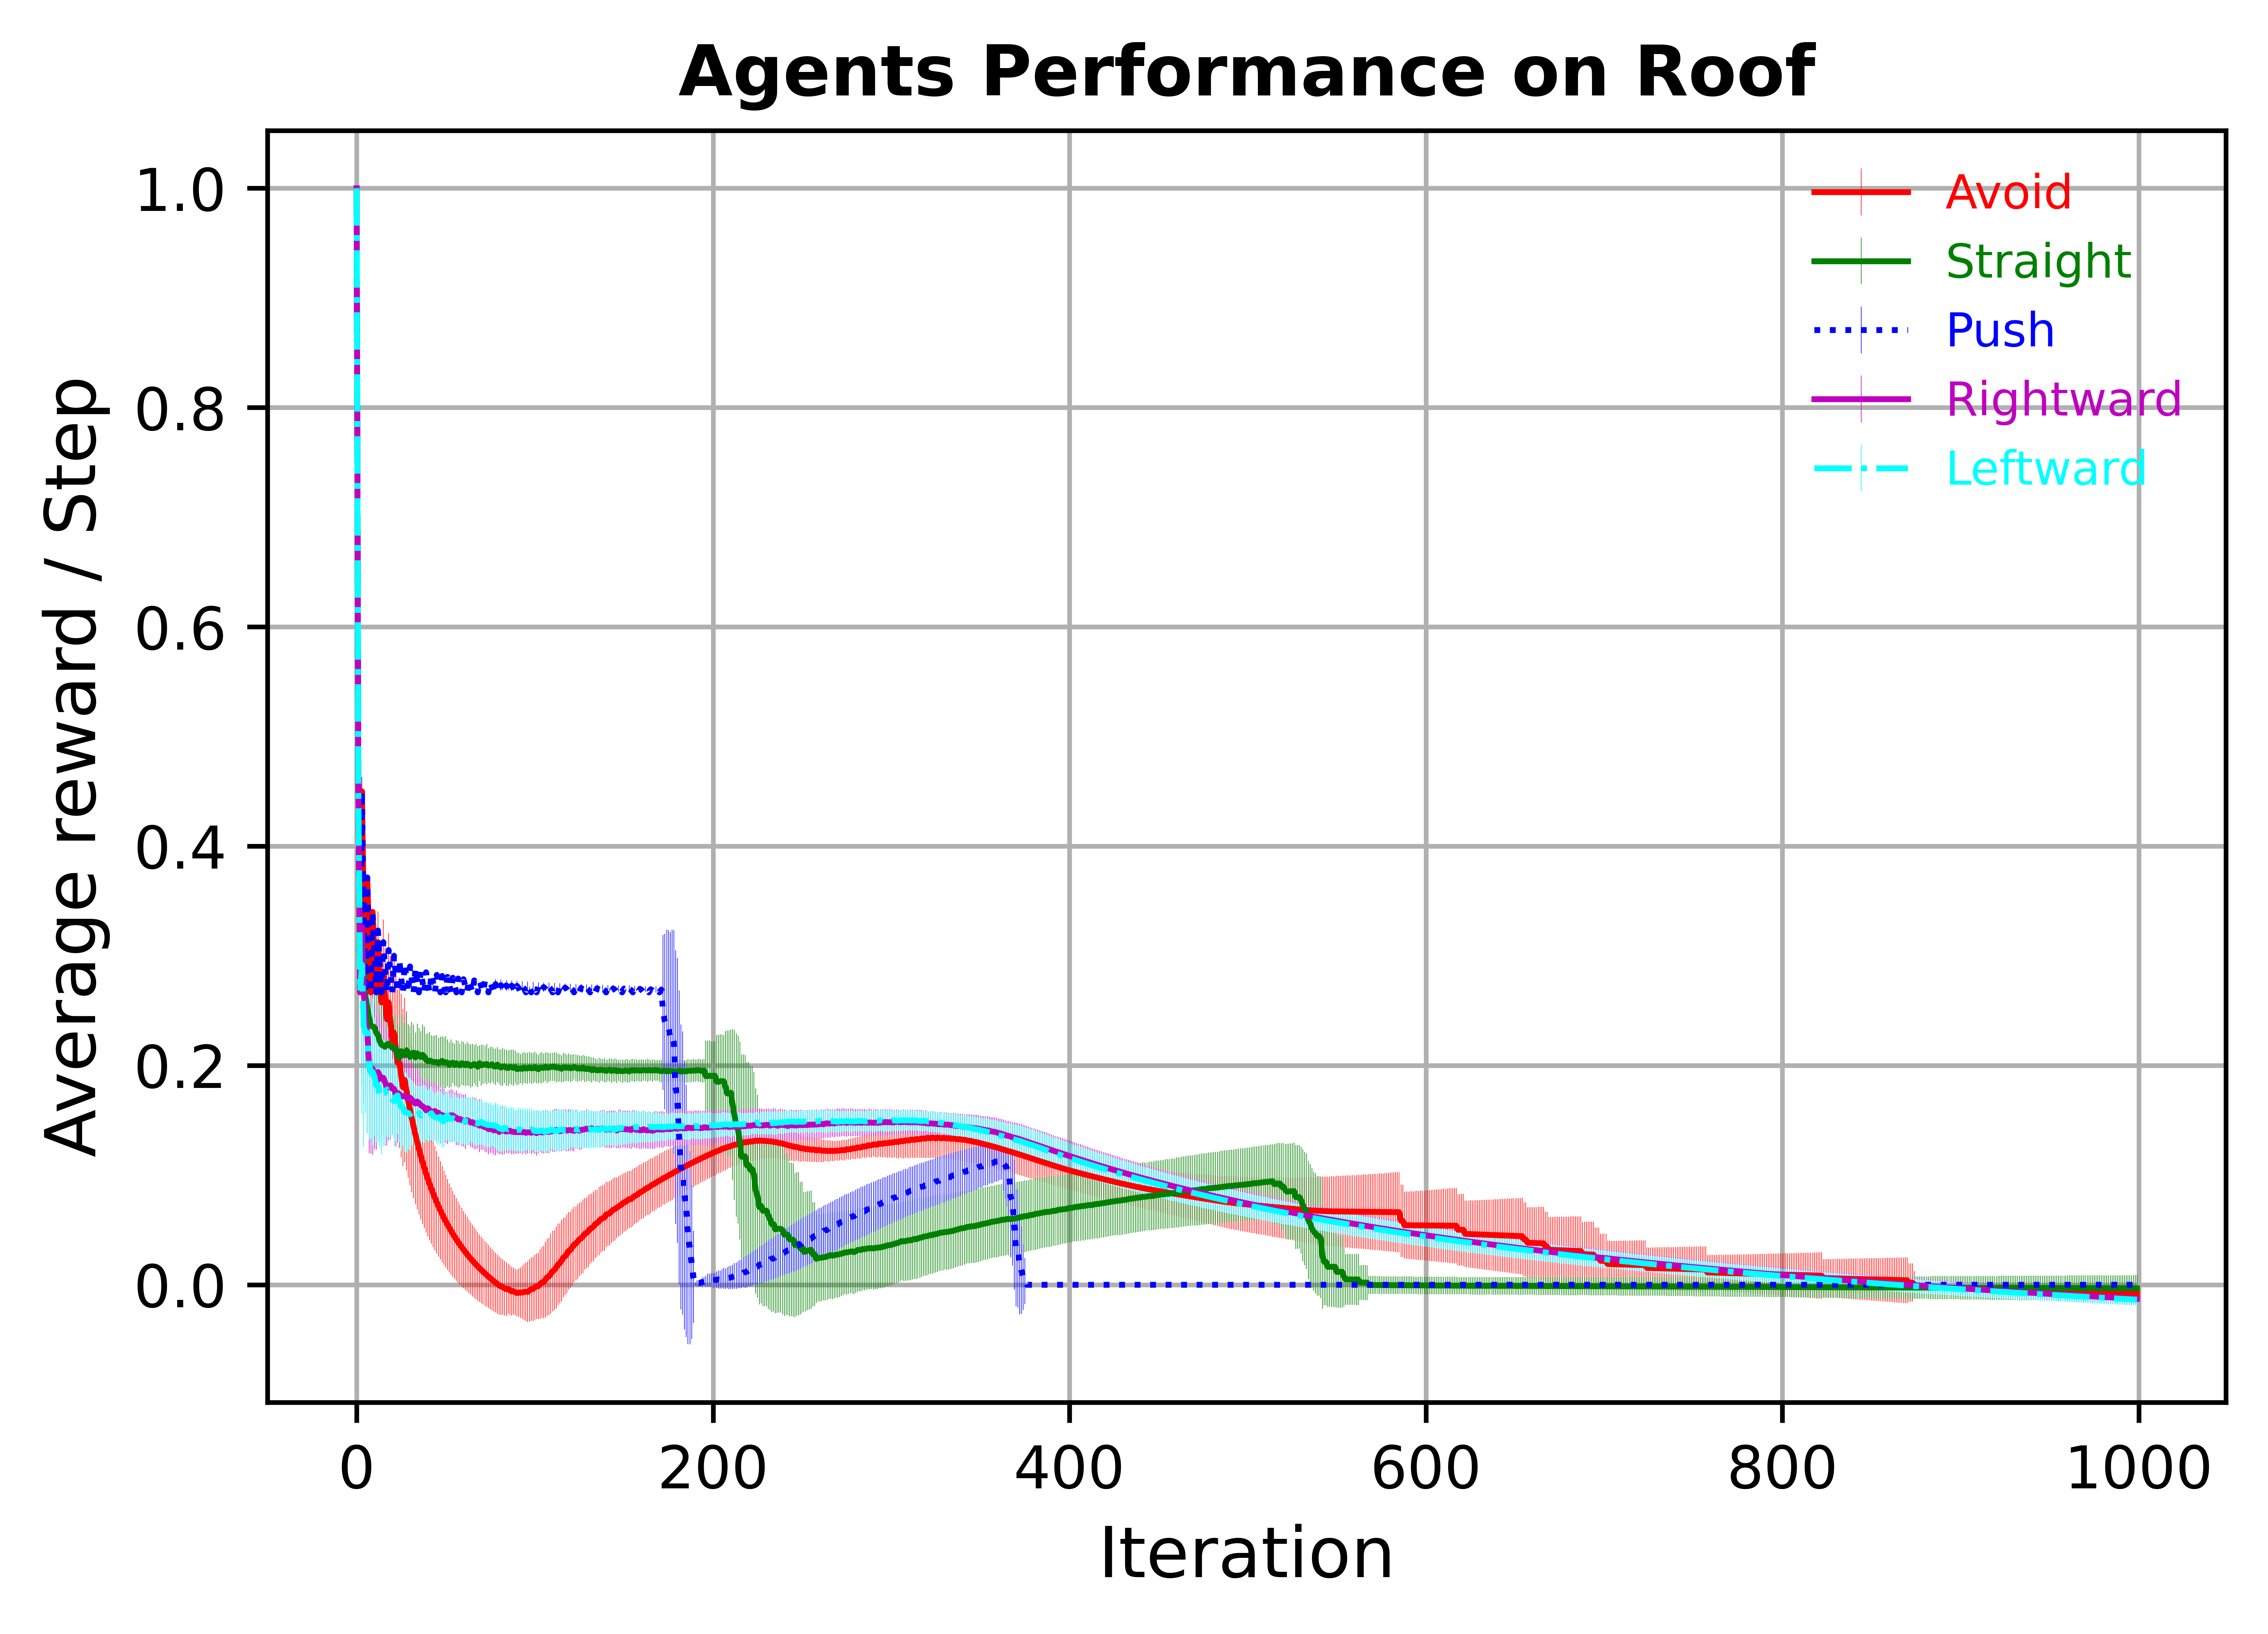

In [50]:
plt.figure(dpi=1200)

plt.errorbar(X, y4_data, yerr = y4_std_dvt, linewidth=1, label="Avoid", marker='', color='r', linestyle='-',ecolor='r',elinewidth=0.1,errorevery=1)
plt.errorbar(X, y1_data, yerr = y1_std_dvt, linewidth=1, label="Straight", marker='', color='g', linestyle='-',ecolor='g',elinewidth=0.1,errorevery=1)
plt.errorbar(X, y5_data, yerr = y5_std_dvt, linewidth=1, label="Push", marker='', color='b', linestyle=':',ecolor='b',elinewidth=0.1,errorevery=1)
plt.errorbar(X, y3_data, yerr = y3_std_dvt, linewidth=1, label="Rightward", marker='', color='m', linestyle='-',ecolor='m',elinewidth=0.1,errorevery=1)
plt.errorbar(X, y2_data, yerr = y2_std_dvt, linewidth=1, label="Leftward", marker='', color='cyan', linestyle='-.',ecolor='cyan',elinewidth=0.1,errorevery=1)
plt.legend(loc='lower right')

plt.title('Agents Performance on ' + templateName.capitalize(), fontsize=12, fontweight='bold')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Average reward / Step', fontsize=12)
plt.legend(loc='best', fontsize=8,frameon=False, labelcolor=['r','g','b','m','cyan'])
plt.grid(True)

In [38]:
templateNames = [
    ["collisionball1", "collisionball2", "collisionmix1"],
    ["collisionmix2", "escape", "fallingball"],
    ["frictionbalance2", "frictionbalanceball", "frictionbalanceblue"],
    ["heavyobstacle", "pinball", "pureavoidance"],
    ["roof", "seesaw", "shield"],
    ["tower","",""]
]

In [39]:
ys_data = [
    [],[],[],[],[],[]
]
ys_data_std = [
    [],[],[],[],[],[]
]

In [40]:
x_labels = []

In [41]:
for rowIndex in range(0, 6):
    for colIndex in range(0, 3):
        if (len(templateNames[rowIndex][colIndex]) > 0):
            x_labels.append(templateNames[rowIndex][colIndex])
            data = getTemplateData(templateNames[rowIndex][colIndex])
            ys_data[rowIndex].append(data[0])
            ys_data_std[rowIndex].append(data[1])

In [42]:
y1_final_data = [
    [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[] # each [rewards, stds]
]
y2_final_data = [
    [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[] # each [rewards, stds]
]
y3_final_data = [
    [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[] # each [rewards, stds]
]
y4_final_data = [
    [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[] # each [rewards, stds]
]
y5_final_data = [
    [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[] # each [rewards, stds]
]

In [43]:
count = 0
for rowIndex in range(0, 6):
    for colIndex in range(0, 3):
        if (len(templateNames[rowIndex][colIndex]) > 0):
            data = getTemplateData(templateNames[rowIndex][colIndex])
            y1_final_data[count] = [np.mean(data[0][0]), np.std(data[1][0])]
            y2_final_data[count] = [np.mean(data[0][1]), np.std(data[1][1])]
            y3_final_data[count] = [np.mean(data[0][2]), np.std(data[1][2])]
            y4_final_data[count] = [np.mean(data[0][3]), np.std(data[1][3])]
            y5_final_data[count] = [np.mean(data[0][4]), np.std(data[1][4])]
            count += 1

In [421]:
y1_final_data[0]

[25.842489999999998, 21.33158535207592]

In [44]:
# agent 1
y1_final_ys = []
y1_final_stds = []
for i in range(0, len(y1_final_data)):
    if (len(y1_final_data[i]) > 0):
        y1_final_ys.append(y1_final_data[i][0])
        y1_final_stds.append(y1_final_data[i][1])
y1_all = list(zip(y1_final_ys, y1_final_stds))

In [45]:
# agent 2
y2_final_ys = []
y2_final_stds = []
for i in range(0, len(y2_final_data)):
    if (len(y2_final_data[i]) > 0):
        y2_final_ys.append(y2_final_data[i][0])
        y2_final_stds.append(y2_final_data[i][1])
y2_all = list(zip(y2_final_ys, y2_final_stds))

# agent 3
y3_final_ys = []
y3_final_stds = []
for i in range(0, len(y3_final_data)):
    if (len(y3_final_data[i]) > 0):
        y3_final_ys.append(y3_final_data[i][0])
        y3_final_stds.append(y3_final_data[i][1])
y3_all = list(zip(y3_final_ys, y3_final_stds))
        
# agent 4
y4_final_ys = []
y4_final_stds = []
for i in range(0, len(y4_final_data)):
    if (len(y4_final_data[i]) > 0):
        y4_final_ys.append(y4_final_data[i][0])
        y4_final_stds.append(y4_final_data[i][1])
y4_all = list(zip(y4_final_ys, y4_final_stds))
        
# agent 5
y5_final_ys = []
y5_final_stds = []
for i in range(0, len(y5_final_data)):
    if (len(y5_final_data[i]) > 0):
        y5_final_ys.append(y5_final_data[i][0])
        y5_final_stds.append(y5_final_data[i][1])
y5_all = list(zip(y5_final_ys, y5_final_stds))

In [465]:
# y1_all.sort(key=lambda tup: tup[0], reverse=True)

In [464]:
# y2_all.sort(key=lambda tup: tup[0], reverse=True)
# y3_all.sort(key=lambda tup: tup[0], reverse=True)
# y4_all.sort(key=lambda tup: tup[0], reverse=True)
# y5_all.sort(key=lambda tup: tup[0], reverse=True)

In [467]:
# y1_sorted = [x[0] for x in y1_all]
# y1_sorted_std = [x[1] for x in y1_all]

# y2_sorted = [x[0] for x in y2_all]
# y2_sorted_std = [x[1] for x in y2_all]

# y3_sorted = [x[0] for x in y3_all]
# y3_sorted_std = [x[1] for x in y3_all]

# y4_sorted = [x[0] for x in y4_all]
# y4_sorted_std = [x[1] for x in y4_all]

# y5_sorted = [x[0] for x in y5_all]
# y5_sorted_std = [x[1] for x in y5_all]

In [46]:
X_generalized = [int(x+1) for x in range(0, count)]

In [47]:
x_labels

['collisionball1',
 'collisionball2',
 'collisionmix1',
 'collisionmix2',
 'escape',
 'fallingball',
 'frictionbalance2',
 'frictionbalanceball',
 'frictionbalanceblue',
 'heavyobstacle',
 'pinball',
 'pureavoidance',
 'roof',
 'seesaw',
 'shield',
 'tower']

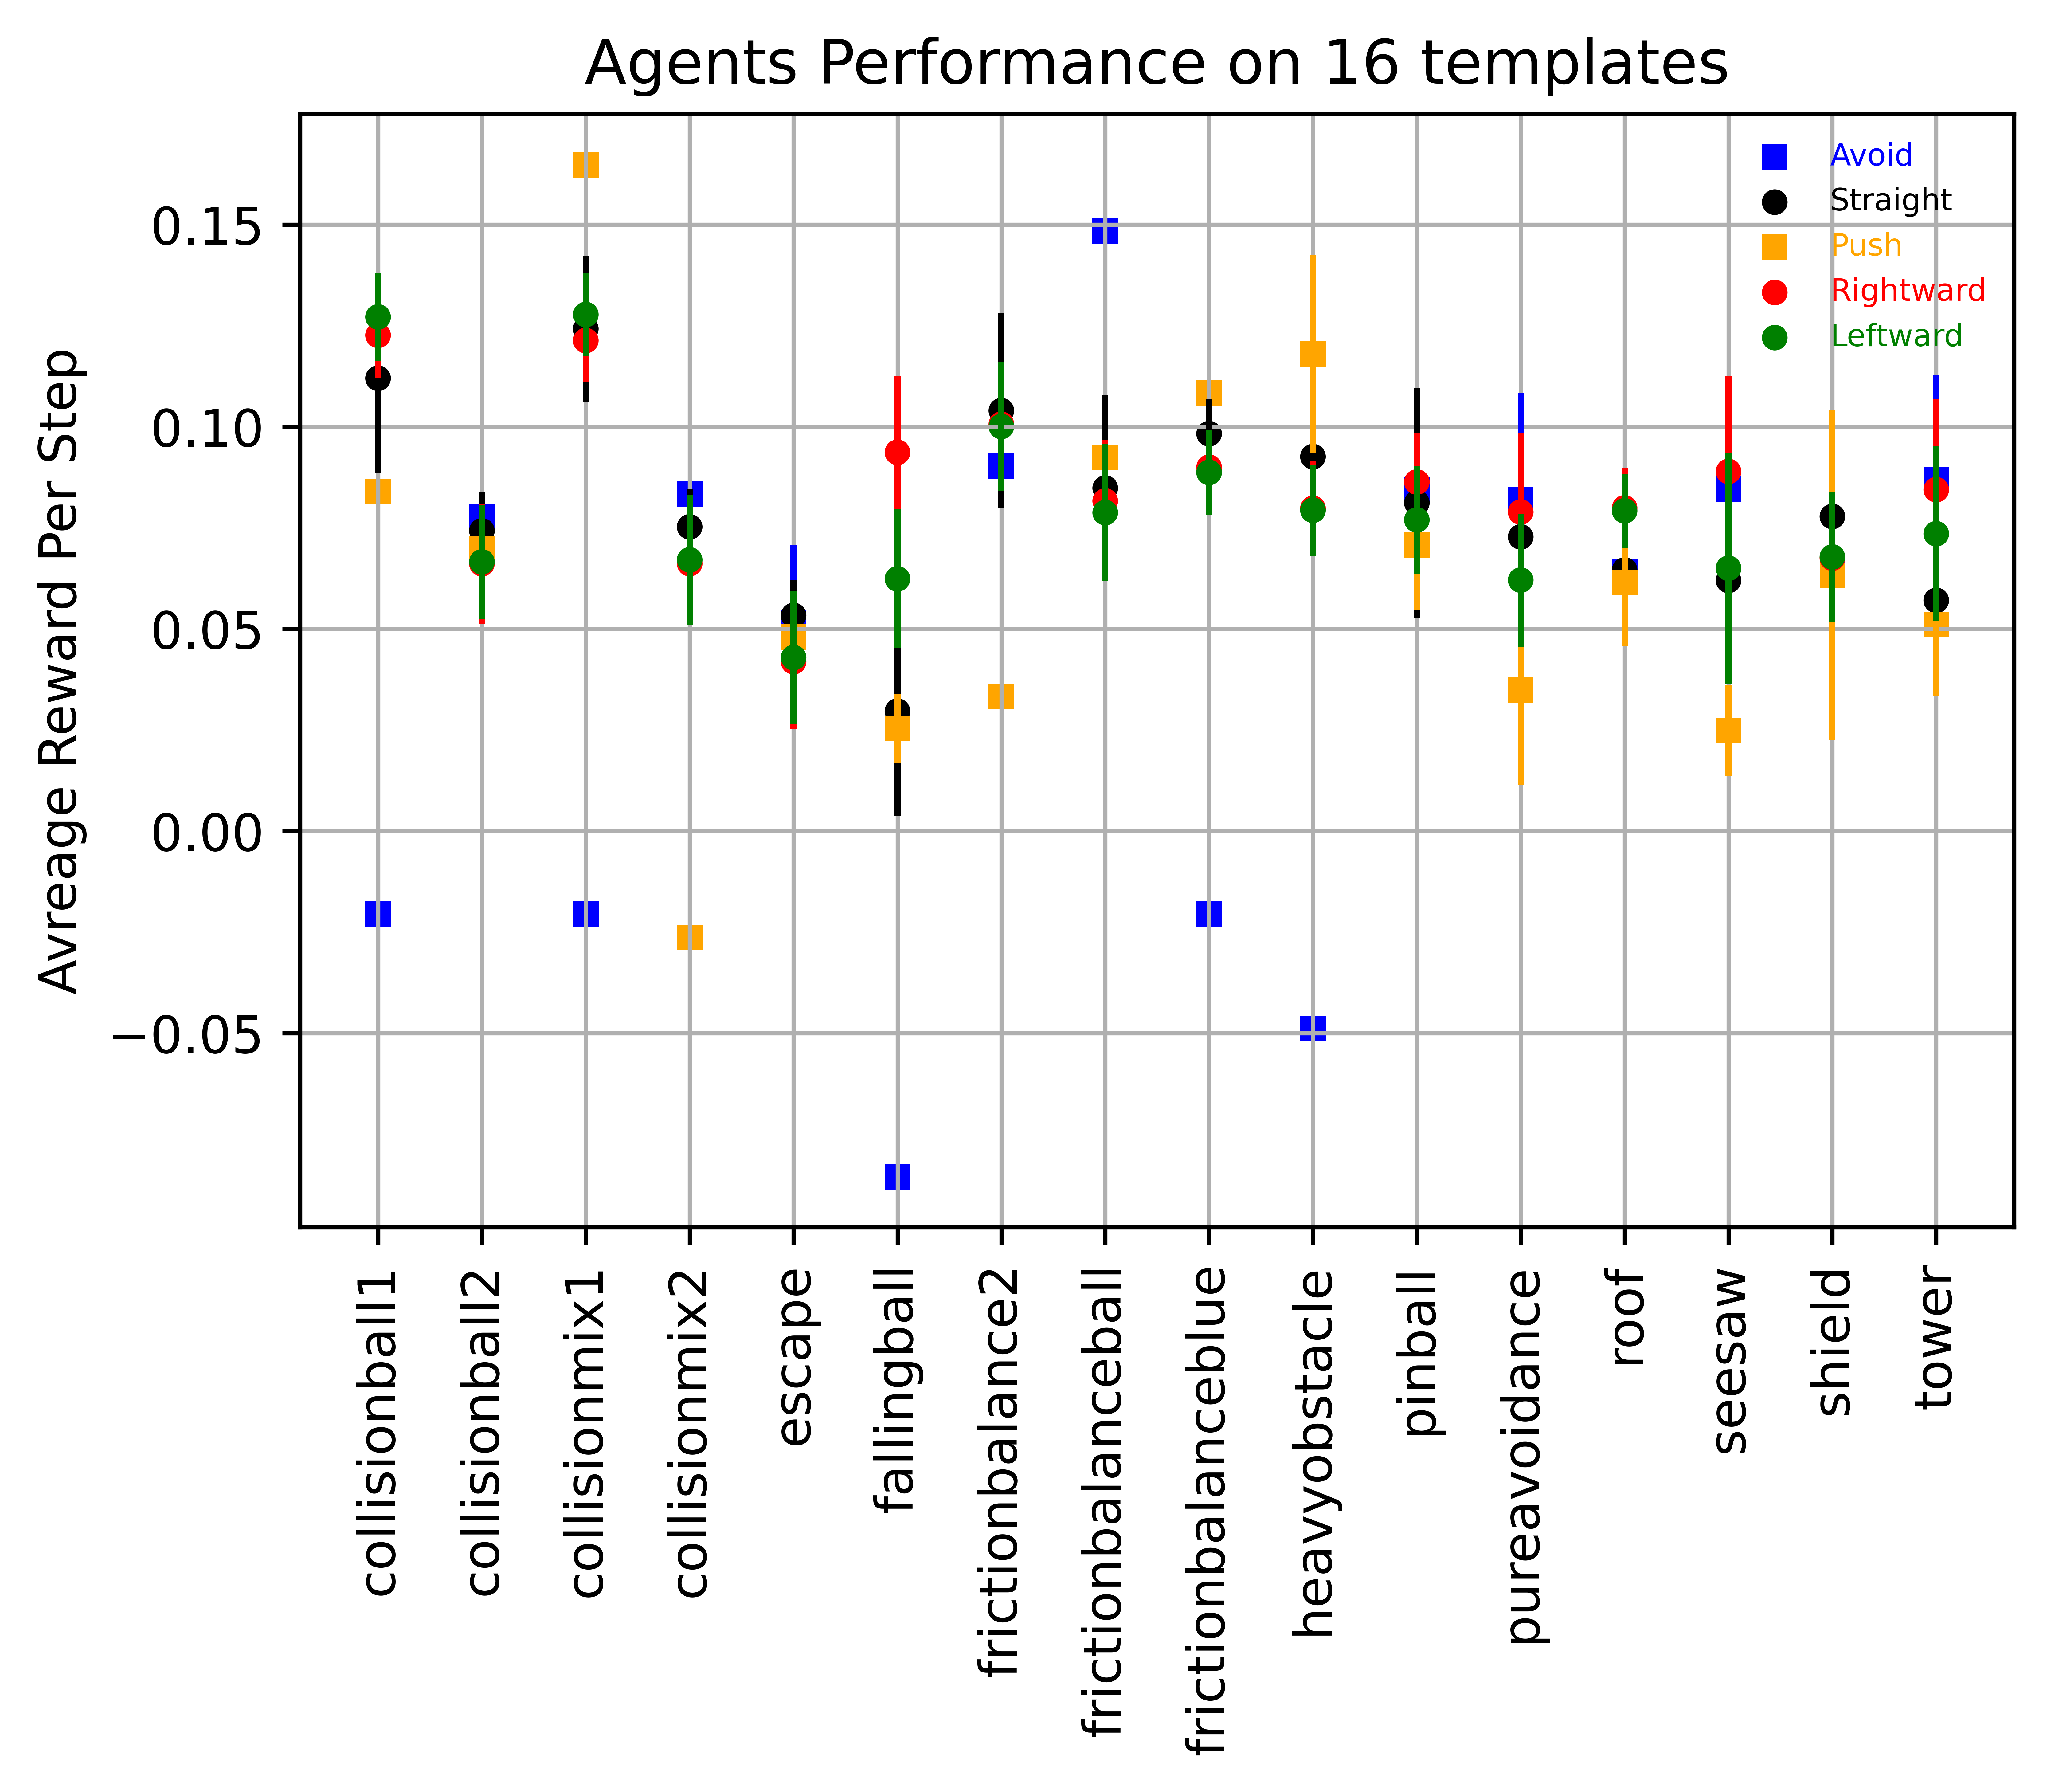

In [48]:
plt.figure(dpi=1200)

markerSize=25

# plt.plot(X_generalized, y4_final_ys, c='b')
# plt.plot(X_generalized, y1_final_ys, c='black')
# plt.plot(X_generalized, y5_final_ys, c='orange')
# plt.plot(X_generalized, y3_final_ys, c='r')
# plt.plot(X_generalized, y2_final_ys, c='g')

linewidths = 0.5

plt.errorbar(x_labels, y4_final_ys, yerr = y4_final_stds, linewidth=linewidths, marker='', color='b', linestyle='',ecolor='b',elinewidth=1.2,errorevery=1)
plt.errorbar(x_labels, y1_final_ys, yerr = y1_final_stds, linewidth=linewidths, marker='', color='black', linestyle='',ecolor='black',elinewidth=1.2,errorevery=1)
plt.errorbar(x_labels, y5_final_ys, yerr = y5_final_stds, linewidth=linewidths, marker='', color='orange', linestyle='',ecolor='orange',elinewidth=1.2,errorevery=1)
plt.errorbar(x_labels, y3_final_ys, yerr = y3_final_stds, linewidth=linewidths, marker='', color='r', linestyle='',ecolor='r',elinewidth=1.2,errorevery=1)
plt.errorbar(x_labels, y2_final_ys, yerr = y2_final_stds, linewidth=linewidths, marker='', color='g', linestyle='',ecolor='g',elinewidth=1.2,errorevery=1)

plt.scatter(x=x_labels, y=y4_final_ys, c='b', alpha=1, s=markerSize, marker='s', edgecolors='none', label="Avoid")
plt.scatter(x=x_labels, y=y1_final_ys, c='black', alpha=1, s=markerSize, marker='o', edgecolors='none', label="Straight")
plt.scatter(x=x_labels, y=y5_final_ys, c='orange', alpha=1, s=markerSize, marker='s', edgecolors='none', label="Push")
plt.scatter(x=x_labels, y=y3_final_ys, c='r', alpha=1, s=markerSize, marker='o', edgecolors='none', label="Rightward")
plt.scatter(x=x_labels, y=y2_final_ys, c='g', alpha=1, s=markerSize, marker='o', edgecolors='none', label="Leftward")

plt.legend(loc='lower right')

plt.title('Agents Performance on ' + str(count) + ' templates')
plt.ylabel('Avreage Reward Per Step')
plt.legend(loc='best',frameon=False, labelcolor=['b','black','orange','r','g'], fontsize=6)
# plt.xticks(X_generalized, labels=x_labels)
plt.xticks(rotation = 90)
plt.grid(True)

In [358]:
ys_data[0][0]

[[2.0,
  0.9499999999999998,
  0.5999999999999999,
  0.635,
  0.6140000000000001,
  0.565,
  0.5599999999999999,
  0.5824999999999999,
  0.5533333333333332,
  0.53,
  0.510909090909091,
  0.53,
  0.53,
  0.5000000000000001,
  0.5300000000000001,
  0.5300000000000001,
  0.4929411764705883,
  0.5183333333333334,
  0.5189473684210528,
  0.4985000000000001,
  0.48000000000000026,
  0.510909090909091,
  0.5026086956521741,
  0.4950000000000001,
  0.5216000000000002,
  0.505769230769231,
  0.4911111111111112,
  0.5000000000000001,
  0.493793103448276,
  0.4880000000000001,
  0.4825806451612905,
  0.4906250000000002,
  0.4854545454545455,
  0.4805882352941178,
  0.47600000000000015,
  0.46583333333333343,
  0.478918918918919,
  0.4747368421052632,
  0.4707692307692308,
  0.47225,
  0.4787804878048781,
  0.475,
  0.4811627906976743,
  0.47272727272727266,
  0.46933333333333327,
  0.47521739130434765,
  0.4719148936170211,
  0.47312499999999985,
  0.48285714285714265,
  0.47539999999999977,
  0

In [359]:
ys_data[0][1]

[[2.0,
  0.9499999999999998,
  0.5999999999999999,
  0.635,
  0.6140000000000001,
  0.565,
  0.5599999999999999,
  0.5824999999999999,
  0.5533333333333332,
  0.53,
  0.510909090909091,
  0.53,
  0.53,
  0.5000000000000001,
  0.5300000000000001,
  0.5300000000000001,
  0.4929411764705883,
  0.5183333333333334,
  0.5189473684210528,
  0.4985000000000001,
  0.48000000000000026,
  0.510909090909091,
  0.5026086956521741,
  0.4950000000000001,
  0.5216000000000002,
  0.505769230769231,
  0.4911111111111112,
  0.5000000000000001,
  0.493793103448276,
  0.4880000000000001,
  0.4825806451612905,
  0.4906250000000002,
  0.4854545454545455,
  0.4805882352941178,
  0.47600000000000015,
  0.46583333333333343,
  0.478918918918919,
  0.4747368421052632,
  0.4707692307692308,
  0.47225,
  0.4787804878048781,
  0.475,
  0.4811627906976743,
  0.47272727272727266,
  0.46933333333333327,
  0.47521739130434765,
  0.4719148936170211,
  0.47312499999999985,
  0.48285714285714265,
  0.47539999999999977,
  0

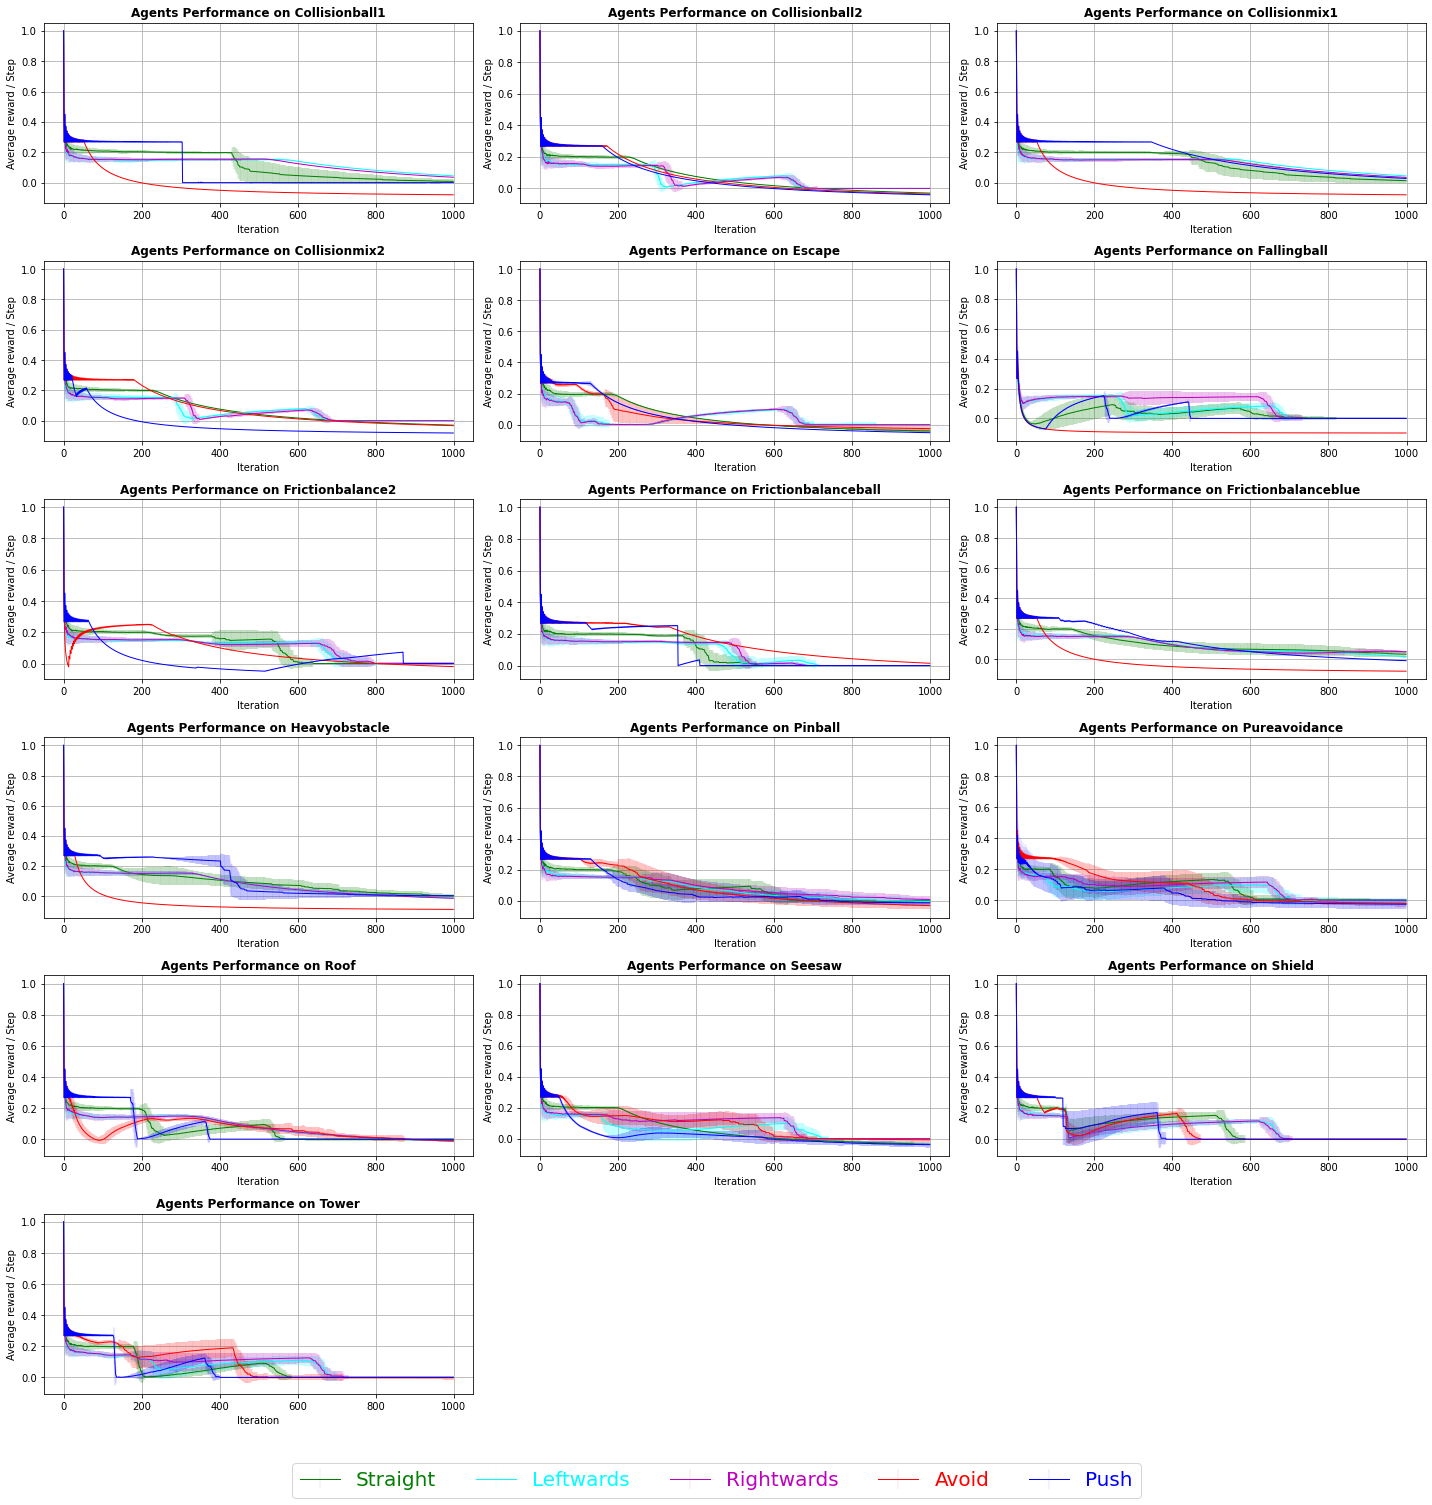

In [49]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))

for rowIndex in range(0, 6):
    for colIndex in range(0, 3):
        if (len(templateNames[rowIndex][colIndex]) > 0):
            subplot_data(axs, rowIndex, colIndex)
        else:
            axs[rowIndex, colIndex].remove()

fig.tight_layout()
labels=np.array(['Straight','Leftwards','Rightwards','Avoid','Push'])
fig.legend(labels, loc='lower center', bbox_to_anchor=(0.5,-0.05), ncol=len(labels), bbox_transform=fig.transFigure, fontsize=20,frameon=True, labelcolor=['g','cyan','m','r','b'])
plt.show()

In [102]:
ATTEMPTS = 1

avoidAgentEval = getTemplateRewardDict( avoidAgent, rewardfn=rewardfn, 
                                    VARIANTS=VARIANTS, ATTEMPTS=ATTEMPTS,
                                    ITERS=ITERS )

Variant: 0. Progress: 0.0
Variant: 1. Progress: 0.025
Variant: 2. Progress: 0.05
Variant: 3. Progress: 0.075
Variant: 4. Progress: 0.1
Variant: 5. Progress: 0.125
Variant: 6. Progress: 0.15
Variant: 7. Progress: 0.175
Variant: 8. Progress: 0.2
Variant: 9. Progress: 0.225
Variant: 10. Progress: 0.25
Variant: 11. Progress: 0.275
Variant: 12. Progress: 0.3
Variant: 13. Progress: 0.325
Variant: 14. Progress: 0.35
Variant: 15. Progress: 0.375
Variant: 16. Progress: 0.4
Variant: 17. Progress: 0.425
Variant: 18. Progress: 0.45
Variant: 19. Progress: 0.475
Variant: 20. Progress: 0.5
Variant: 21. Progress: 0.525
Variant: 22. Progress: 0.55
Variant: 23. Progress: 0.575
Variant: 24. Progress: 0.6
Variant: 25. Progress: 0.625
Variant: 26. Progress: 0.65
Variant: 27. Progress: 0.675
Variant: 28. Progress: 0.7
Variant: 29. Progress: 0.725
Variant: 30. Progress: 0.75
Variant: 31. Progress: 0.775
Variant: 32. Progress: 0.8
Variant: 33. Progress: 0.825
Variant: 34. Progress: 0.85
Variant: 35. Progress:

Variant: 13. Progress: 0.325
Variant: 14. Progress: 0.35
Variant: 15. Progress: 0.375
Variant: 16. Progress: 0.4
Variant: 17. Progress: 0.425
Variant: 18. Progress: 0.45
Variant: 19. Progress: 0.475
Variant: 20. Progress: 0.5
Variant: 21. Progress: 0.525
Variant: 22. Progress: 0.55
Variant: 23. Progress: 0.575
Variant: 24. Progress: 0.6
Variant: 25. Progress: 0.625
Variant: 26. Progress: 0.65
Variant: 27. Progress: 0.675
Variant: 28. Progress: 0.7
Variant: 29. Progress: 0.725
Variant: 30. Progress: 0.75
Variant: 31. Progress: 0.775
Variant: 32. Progress: 0.8
Variant: 33. Progress: 0.825
Variant: 34. Progress: 0.85
Variant: 35. Progress: 0.875
Variant: 36. Progress: 0.9
Variant: 37. Progress: 0.925
Variant: 38. Progress: 0.95
Variant: 39. Progress: 0.975
Variant: 0. Progress: 0.0
Variant: 1. Progress: 0.025
Variant: 2. Progress: 0.05
Variant: 3. Progress: 0.075
Variant: 4. Progress: 0.1
Variant: 5. Progress: 0.125
Variant: 6. Progress: 0.15
Variant: 7. Progress: 0.175
Variant: 8. Progre

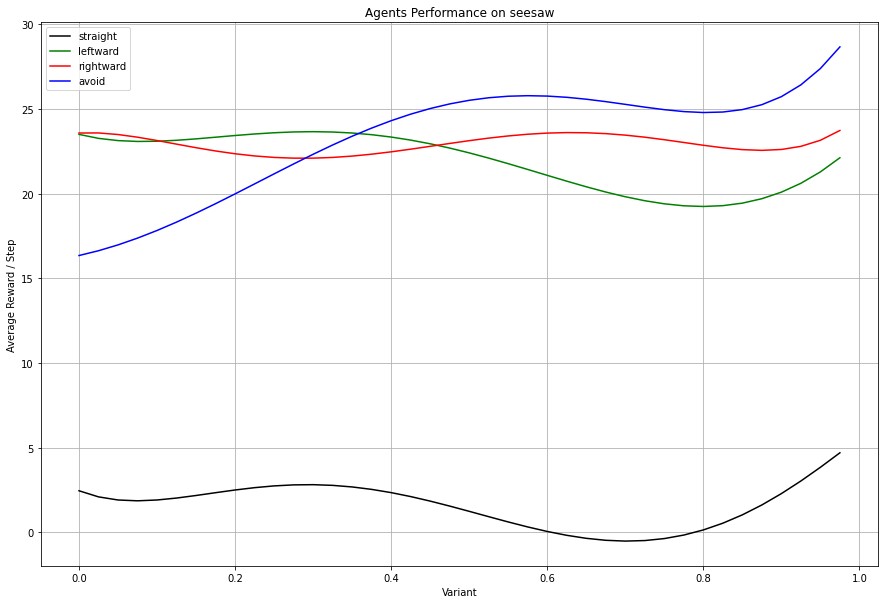

In [103]:
# Plot:
templateName = 'seesaw'

plt.figure(figsize=(15, 10))

X = [float(x / VARIANTS) for x in range(0, VARIANTS)]


# plt.scatter(x=X, y=agent1Eval[templateName], c='black', alpha=0.7, s=15, marker='s')
# plt.scatter(x=X, y=agent2Eval[templateName], c='g', alpha=0.7, s=15, marker='s')
# plt.scatter(x=X, y=agent3Eval[templateName], c='r', alpha=0.7, s=15, marker='s')
# plt.scatter(x=X, y=avoidAgentEval[templateName], c='b', alpha=0.7, s=15, marker='s')

# plt.plot(X, agent1Eval[templateName], c='black', alpha=0.7)
# plt.plot(X, agent2Eval[templateName], c='g', alpha=0.7)
# plt.plot(X, agent3Eval[templateName], c='r', alpha=0.7)
# plt.plot(X, avoidAgentEval[templateName], c='b', alpha=0.7)

# plt.plot([0.0, 1.0], [0.0, 0.0], c='black', linestyle=':')
a1poly = np.poly1d(np.polyfit(x=X, y=agent1Eval[templateName], deg=5))
a2poly = np.poly1d(np.polyfit(x=X, y=agent2Eval[templateName], deg=5))
a3poly = np.poly1d(np.polyfit(x=X, y=agent3Eval[templateName], deg=5))
a4poly = np.poly1d(np.polyfit(x=X, y=avoidAgentEval[templateName], deg=5))

plt.plot(X, a1poly(X), c='black')
plt.plot(X, a2poly(X), c='g')
plt.plot(X, a3poly(X), c='r')
plt.plot(X, a4poly(X), c='b')

plt.title('Agents Performance on ' + templateName)
plt.xlabel('Variant')
plt.ylabel('Average Reward / Step')
plt.grid(True)
plt.legend(['straight', 'leftward', 'rightward', 'avoid'])


plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline

In [183]:
templateName = 'seesaw'

# Data
X = X = [float(x / VARIANTS) for x in range(0, VARIANTS)]

agent1Y = agent1Eval[templateName]
agent2Y = agent1Eval[templateName]
agent3Y = agent1Eval[templateName]
agent4Y = avoidAgentEval[templateName]

In [105]:
# Calculate the average
agent1Y_mean = np.mean(agent1Y)
agent2Y_mean = np.mean(agent2Y)
agent3Y_mean = np.mean(agent3Y)
agent4Y_mean = np.mean(agent4Y)

# Calculate the standard deviation
agent1Y_std = np.std(agent1Y)
agent2Y_std = np.std(agent2Y)
agent3Y_std = np.std(agent3Y)
agent4Y_std = np.std(agent1Y)

plt.errorbar(X, agent1Y, yerr = agent1Y_std, linewidth=1, label="Straight", marker='^', color='cyan', linestyle='-')
plt.errorbar(X, agent2Y, yerr = agent2Y_std, linewidth=1, label="Leftward", marker='^', color='g', linestyle='-.')
plt.errorbar(X, agent3Y, yerr = agent3Y_std, linewidth=1, label="Rightward", marker='^', color='y', linestyle=':')
plt.errorbar(X, agent4Y, yerr = agent4Y_std, linewidth=1, label="Avoid", marker='^', color='b', linestyle='-')
plt.legend(loc='lower right')

plt.title('Agents Performance on ' + templateName)
plt.xlabel('Variant')
plt.ylabel('Average Reward / Step')
plt.legend(loc='best')
plt.grid(True)

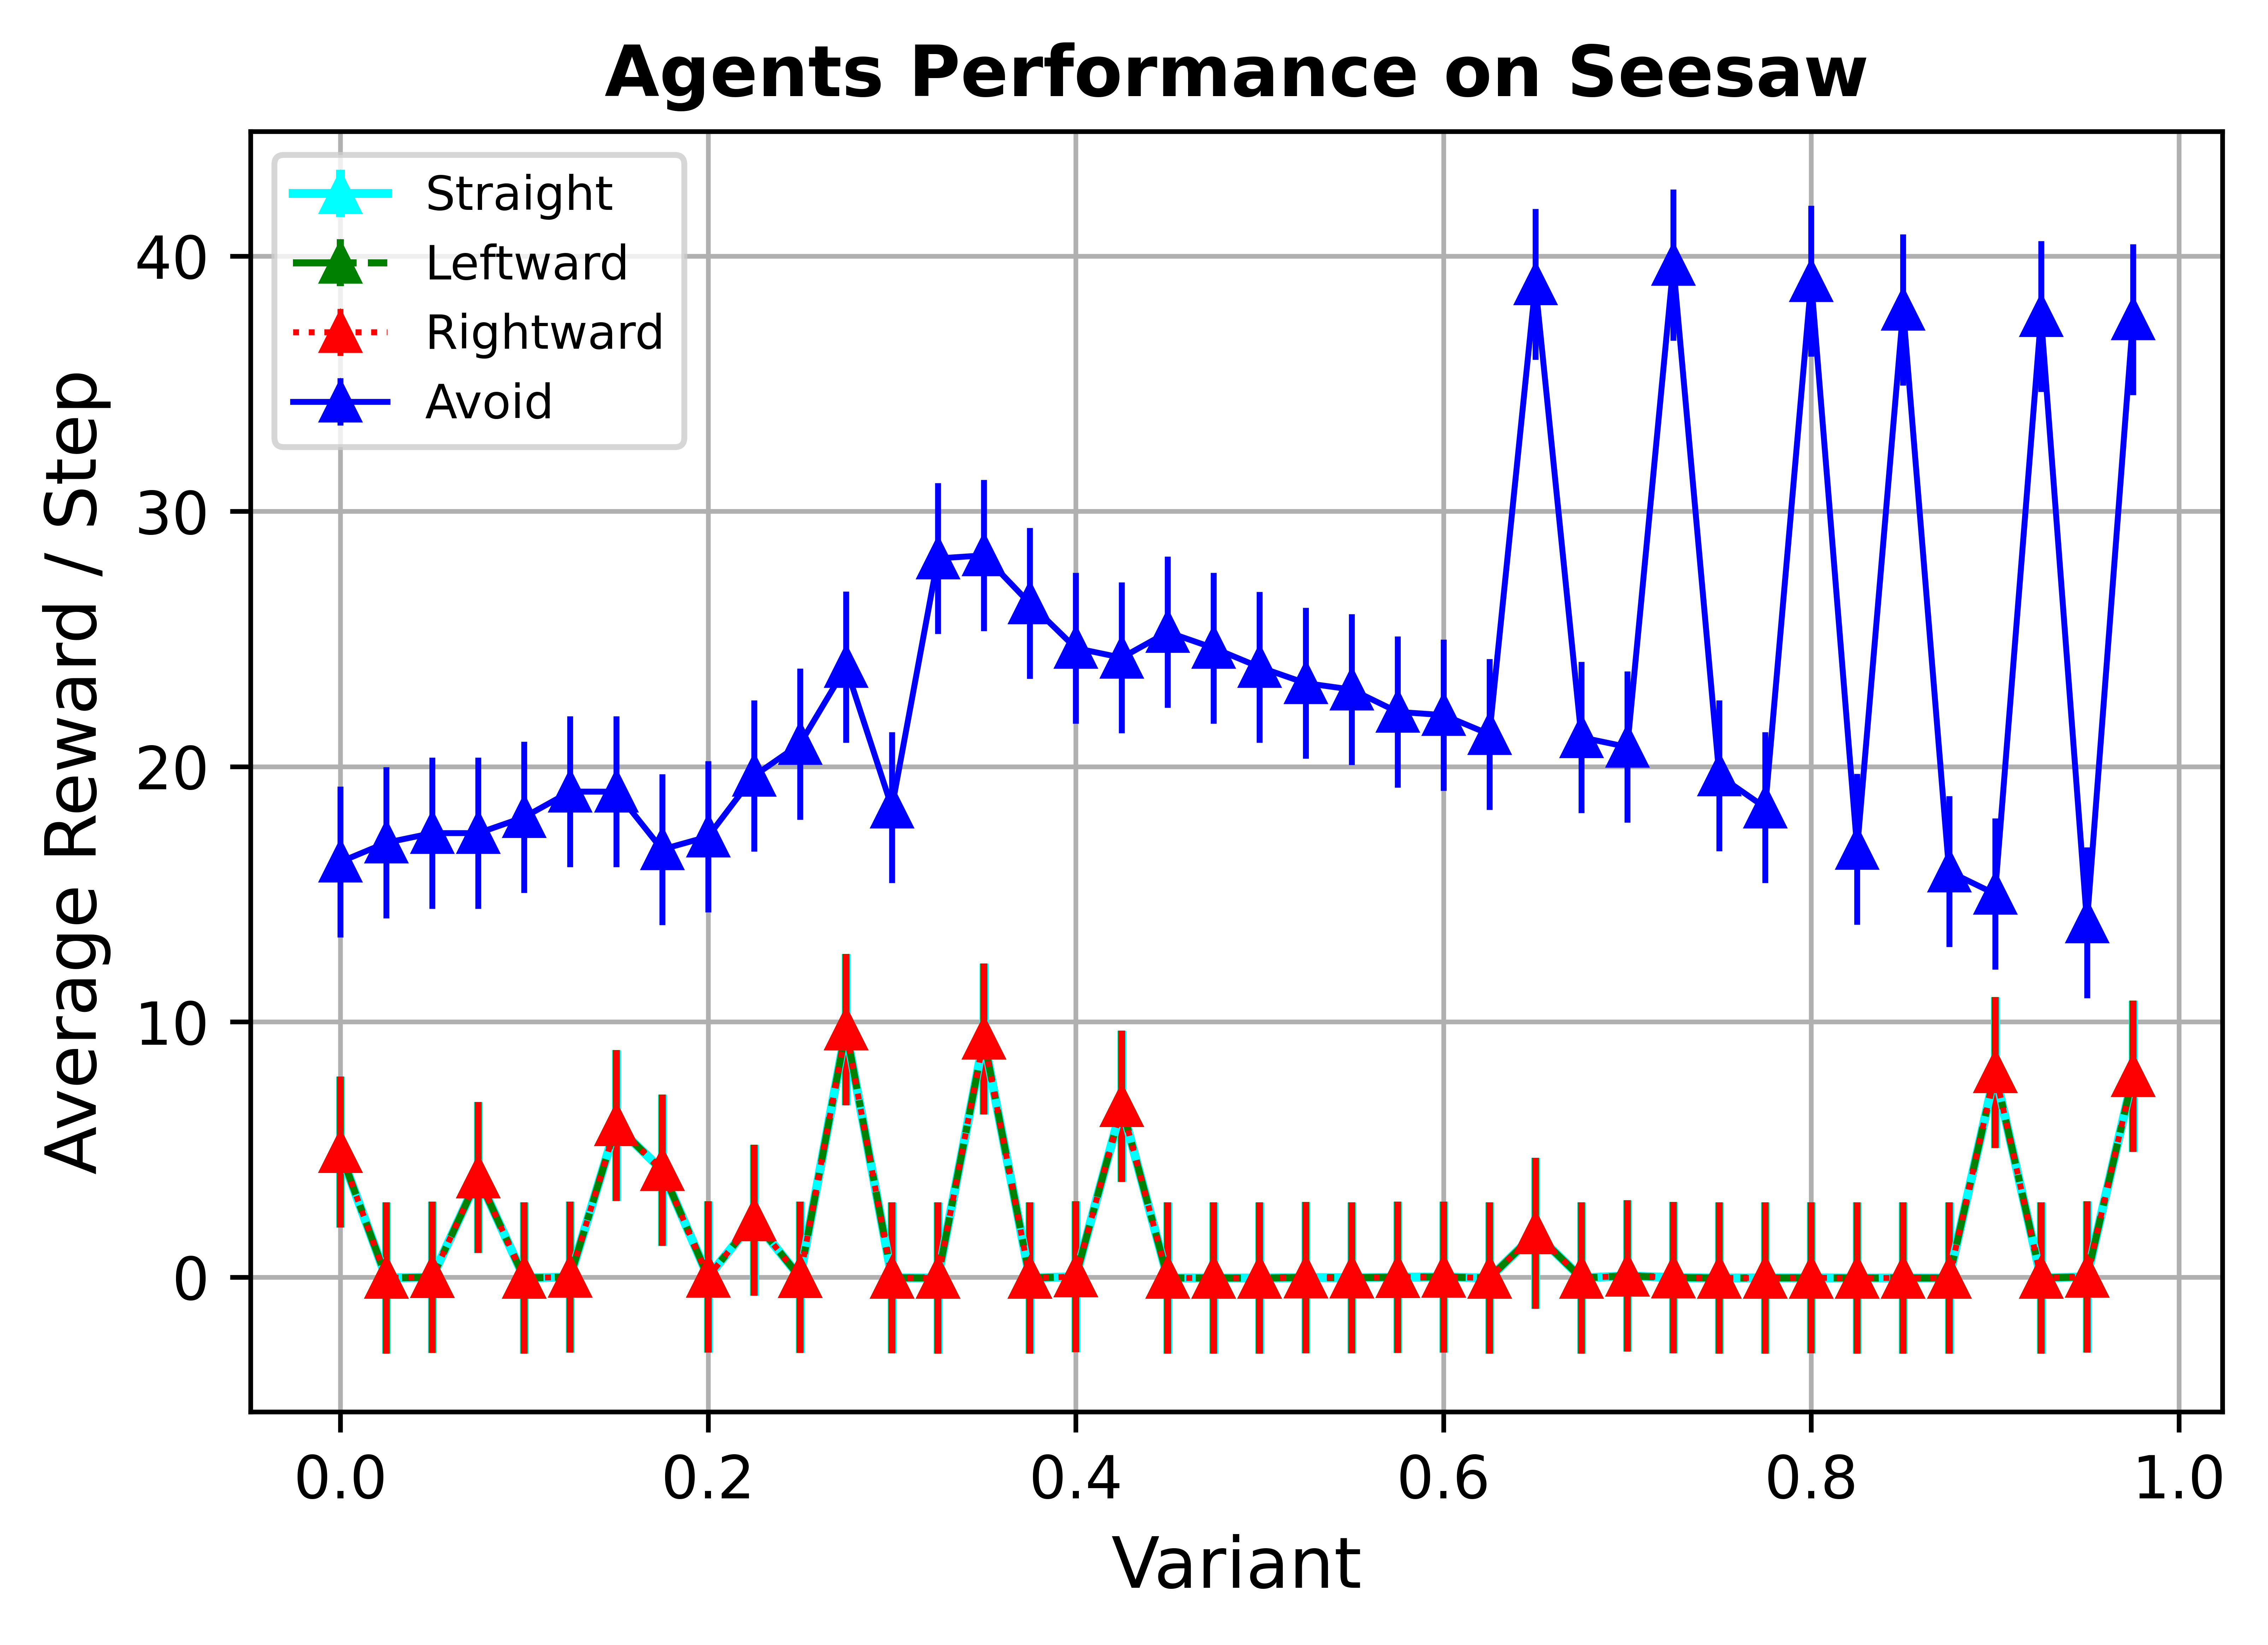

In [106]:
plt.figure(dpi=1200)

plt.errorbar(X, agent1Y, yerr = agent1Y_std, linewidth=1.5, label="Straight", marker='^', color='cyan', linestyle='-')
plt.errorbar(X, agent2Y, yerr = agent2Y_std, linewidth=1.2, label="Leftward", marker='^', color='g', linestyle='-.')
plt.errorbar(X, agent3Y, yerr = agent3Y_std, linewidth=1, label="Rightward", marker='^', color='r', linestyle=':')
plt.errorbar(X, agent4Y, yerr = agent4Y_std, linewidth=1, label="Avoid", marker='^', color='b', linestyle='-')
plt.legend(loc='lower right')

plt.title('Agents Performance on ' + templateName.capitalize(), fontsize=12, fontweight='bold')
plt.xlabel('Variant', fontsize=12)
plt.ylabel('Average Reward / Step', fontsize=12)
plt.legend(loc='best', prop={'size': 8})
plt.grid(True)

In [138]:
templateName = 'seesaw'

In [156]:
from numpy import nan

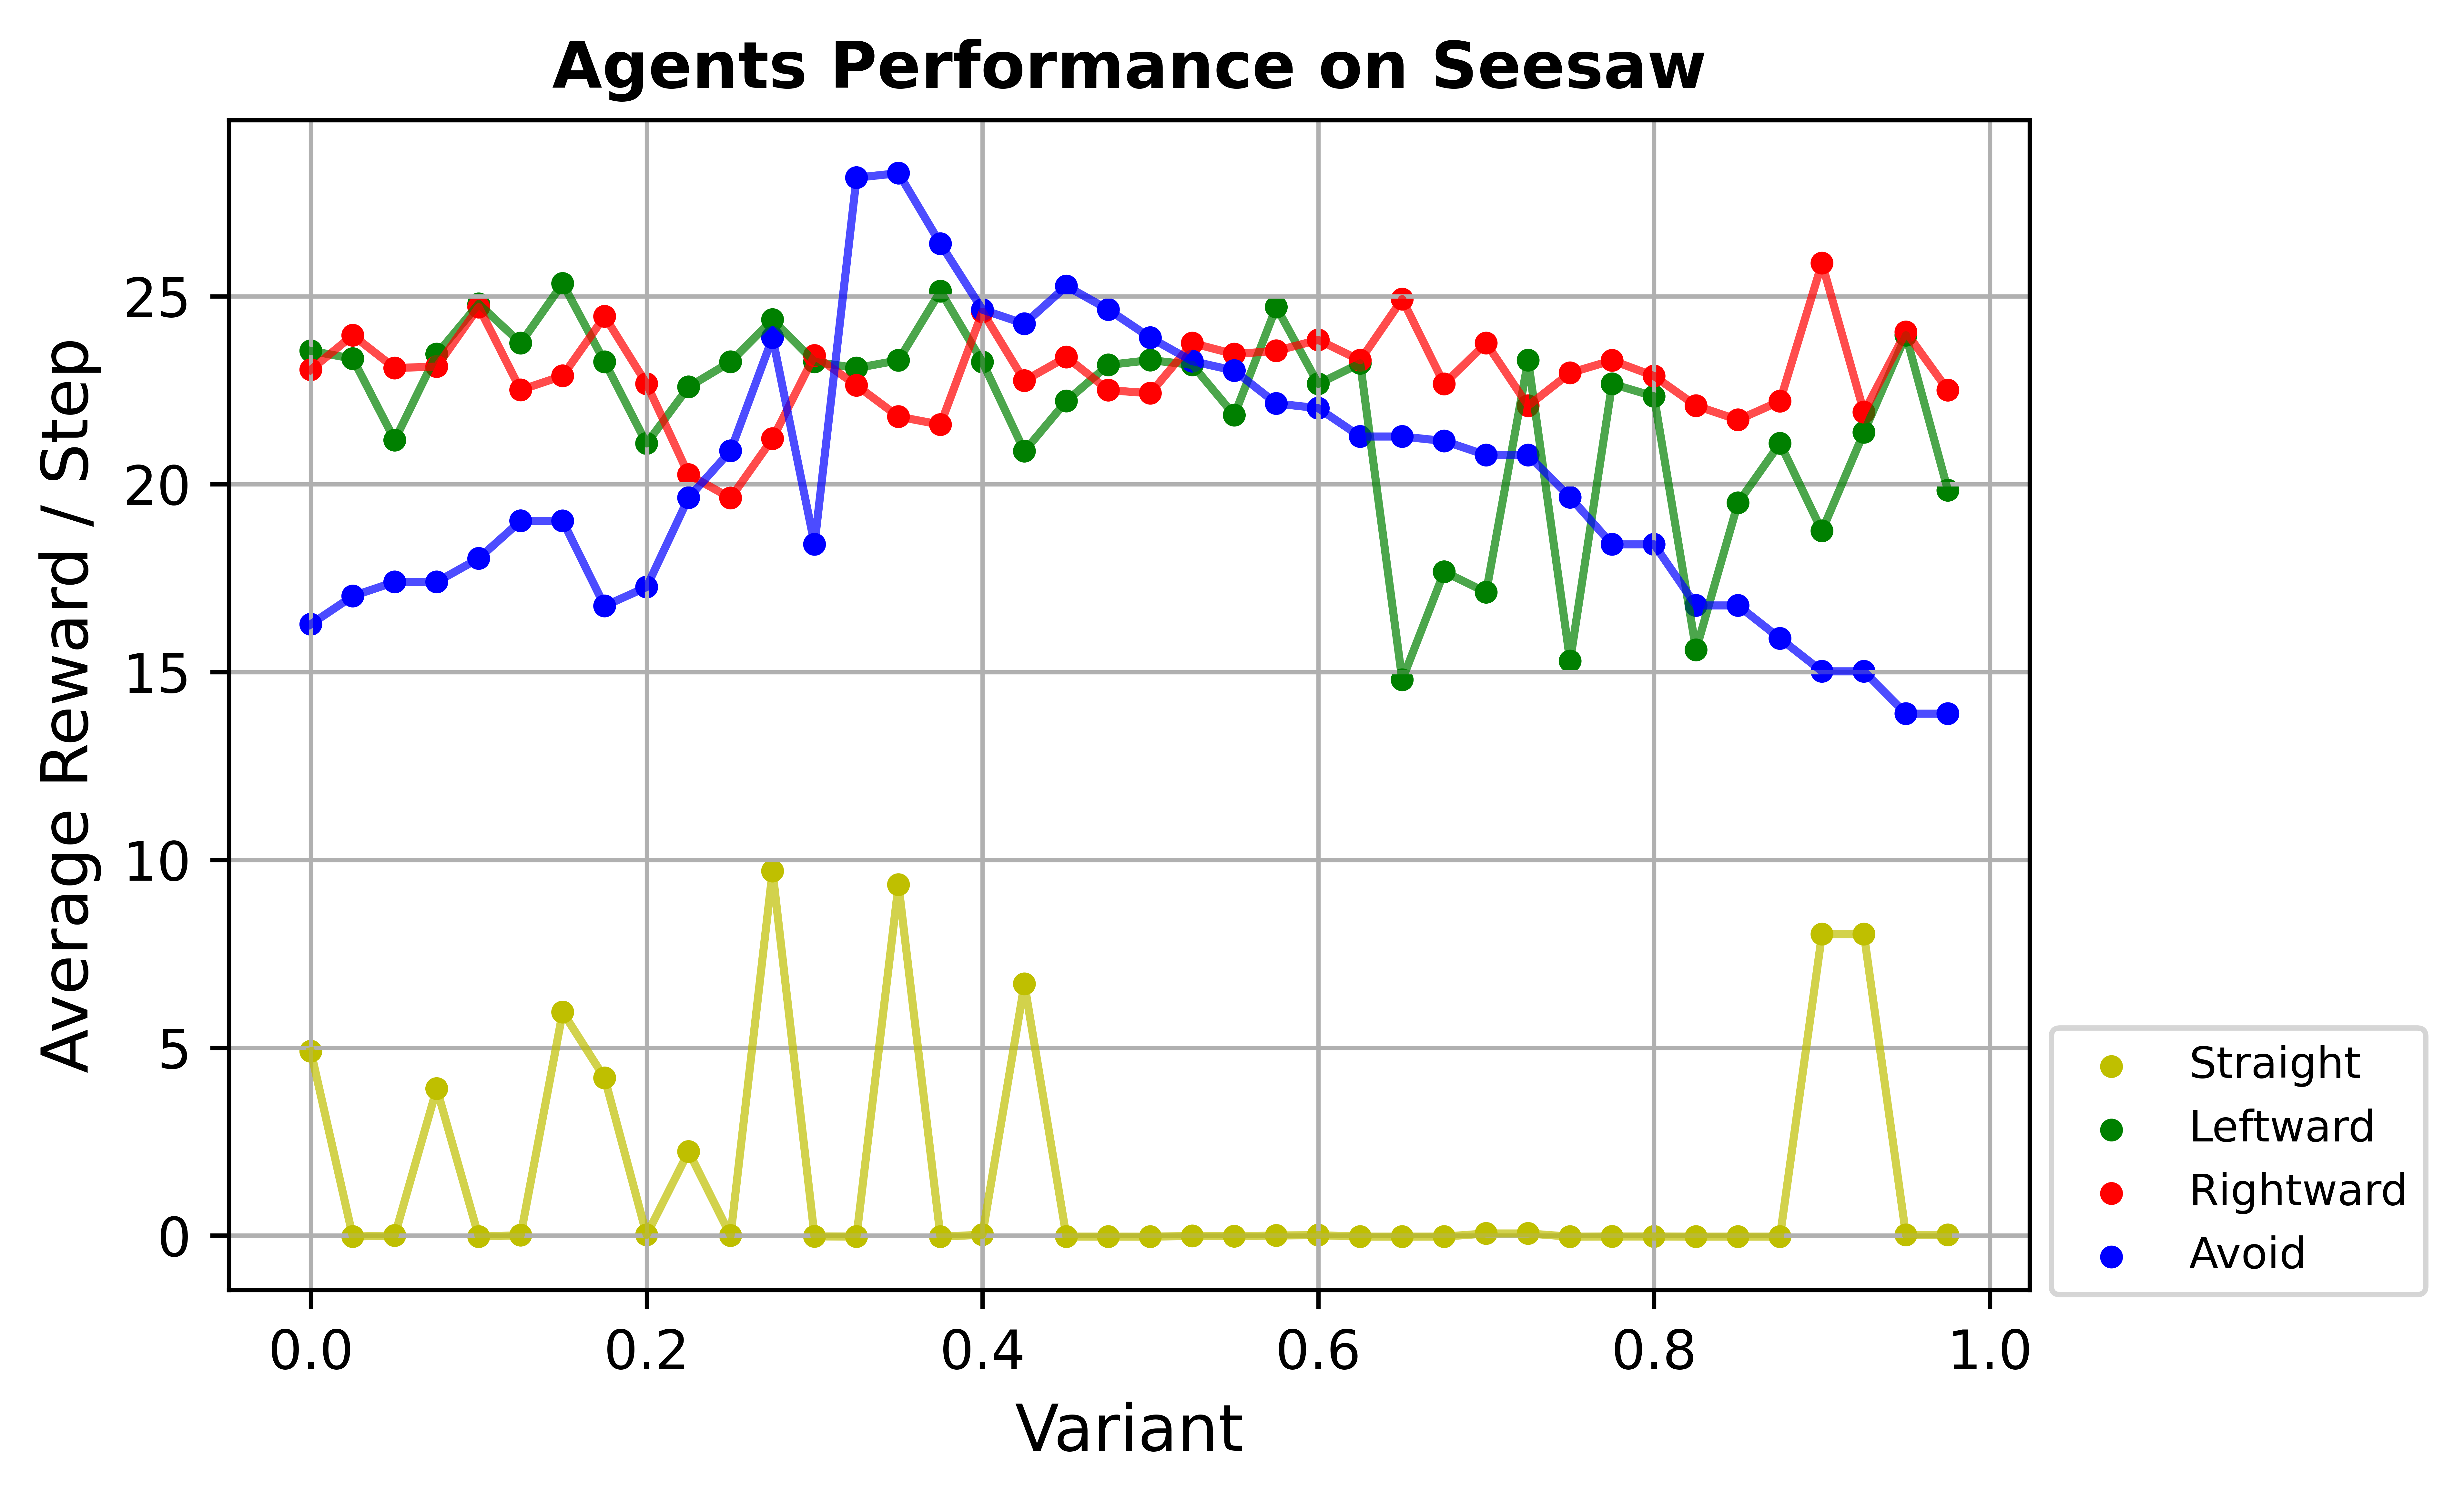

In [192]:
# Scatter
plt.figure(dpi=1200)

agent1Y = agent1Eval[templateName]
agent2Y = agent2Eval[templateName]
agent3Y = agent3Eval[templateName]
agent4Y = avoidAgentEval[templateName]

# Calculate the average
agent1Y_mean = np.mean(agent1Y)
agent2Y_mean = np.mean(agent2Y)
agent3Y_mean = np.mean(agent3Y)
agent4Y_mean = np.mean(agent4Y)

# Calculate the standard deviation
agent1Y_std = np.std(agent1Y)
agent2Y_std = np.std(agent2Y)
agent3Y_std = np.std(agent3Y)
agent4Y_std = np.std(agent1Y)

# errors_x = [0.975, 0.925, 0.85, 0.8, 0.725, 0.65]
# errors_y = [0,0,0,0,0,0]

# count = 0
# for i in range(0,len(X)):
#     if X[i] in [0.975, 0.925, 0.85, 0.8, 0.725, 0.65]:
#         X[i] = X[i]
#         errors_y[errors_x.index(X[i])] = agent4Y[i]
#         agent4Y[i] = agent4Y[i-1]

plt.plot(X, agent1Y, c='y', alpha=0.7)
plt.plot(X, agent2Y, c='g', alpha=0.7)
plt.plot(X, agent3Y, c='r', alpha=0.7)
plt.plot(X, agent4Y, c='b', alpha=0.7)

# plt.errorbar(X, agent1Eval[templateName], yerr = agent1Y_std, linewidth=1, color='y', linestyle='-', label="Straight")
# plt.errorbar(X, agent2Eval[templateName], yerr = agent2Y_std, linewidth=1, color='g', linestyle='-.', label="Leftward")
# plt.errorbar(X, agent3Eval[templateName], yerr = agent3Y_std, linewidth=1, color='r', linestyle=':', label="Rightward")
# plt.errorbar(X, avoidAgentEval[templateName], yerr = agent4Y_std, linewidth=1, color='b', linestyle='-', label="Avoid")

plt.scatter(x=X, y=agent1Y, c='y', alpha=1, s=18, marker='o', edgecolors='none', label="Straight")
plt.scatter(x=X, y=agent2Y, c='g', alpha=1, s=18, marker='o', edgecolors='none', label="Leftward")
plt.scatter(x=X, y=agent3Y, c='r', alpha=1, s=18, marker='o', edgecolors='none', label="Rightward")
plt.scatter(x=X, y=agent4Y, c='b', alpha=1, s=18, marker='o', edgecolors='none', label="Avoid")
# plt.scatter(errors_x, errors_y, c='black', alpha=1, s=40, marker='*', edgecolors='none')

# plt.errorbar(X, agent1Y, yerr = agent1Y_std, linewidth=1, color='y', linestyle='')
# plt.errorbar(X, agent2Y, yerr = agent2Y_std, linewidth=1, color='g', linestyle='')
# plt.errorbar(X, agent3Y, yerr = agent3Y_std, linewidth=1, color='r', linestyle='')
# plt.errorbar(X, agent4Y, yerr = agent4Y_std, linewidth=1, color='b', linestyle='')

plt.title('Agents Performance on ' + templateName.capitalize(), fontsize=12, fontweight='bold')
plt.xlabel('Variant', fontsize=12)
plt.ylabel('Average Reward / Step', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.11), prop={'size': 8})
plt.grid(True)
plt.show()

In [144]:
X

[0.0,
 0.025,
 0.05,
 0.075,
 0.1,
 0.125,
 0.15,
 0.175,
 0.2,
 0.225,
 0.25,
 0.275,
 0.3,
 0.325,
 0.35,
 0.375,
 0.4,
 0.425,
 0.45,
 0.475,
 0.5,
 0.525,
 0.55,
 0.575,
 0.6,
 0.625,
 0.65,
 0.675,
 0.7,
 0.725,
 0.75,
 0.775,
 0.8,
 0.825,
 0.85,
 0.875,
 0.9,
 0.925,
 0.95,
 0.975]

In [ ]:
[0.975, 0.925, 0.85, 0.8, 0.725, 0.65]

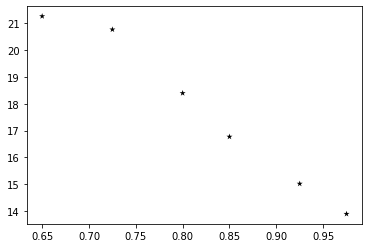

In [173]:
plt.scatter(errors_x, errors_y, c='black', alpha=1, s=40, marker='*', edgecolors='none')
plt.show()

In [185]:
avoidAgentEval[templateName]

[16.270375000000005,
 17.021125,
 17.3965,
 17.3965,
 18.022125000000003,
 19.023125000000004,
 19.020500000000002,
 16.75737499999999,
 17.260749999999987,
 19.63812499999999,
 20.885875000000034,
 23.89962500000003,
 18.3975,
 28.157250000000005,
 28.277125,
 26.397625,
 24.643250000000002,
 24.267875000000004,
 25.2715,
 24.645875,
 23.897750000000002,
 23.272125000000003,
 23.021875,
 22.146000000000004,
 22.020875000000004,
 21.2675,
 21.2675,
 21.147625,
 20.772250000000003,
 20.772250000000003,
 19.648750000000003,
 18.3975,
 18.3975,
 16.770875000000004,
 16.770875000000004,
 15.892375000000001,
 15.0165,
 15.0165,
 13.890375000000004,
 13.890375000000004]